#MIT License

Copyright (c) 2023 Kodand Ram Movva

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

#Abstract

This dataset includes information about the top 500 most expensive footballers in 2021. The dataset includes information about the players' age, club, position, country, as well as their performance statistics such as goals, assists, yellow cards, and red cards.

Additionally, the dataset includes information about the players' market value in millions, which can be used to perform various analyses related to the transfer market. It may be interesting to explore which factors  are most strongly correlated with a player's market value.

Overall, this dataset has the potential to provide valuable insights into the factors that contribute to a player's market value in the football transfer market.

#Aim

In this assignment we aim to create a complete ML project with 



* Checking Data Quality
* Provide valuable insights into the factors that contribute to a player's market value
* Feature Selection
* Modeling - Training Models, Selecting Best Model, Hyperparameter Tuning
* Model Interpretibility
* Reports and Visualizations

#Variable Description

* Name: Name of the footballer
* Age: the age of the footballer
* Matches: the number of matches the footballer played
* Club: the club the footballer currently plays for
* Position: the position the footballer plays (e.g., forward, midfielder, defender, goalkeeper)
* Country: the country the footballer represents
* Goals: the number of goals the footballer has scored
* Own Goals: the number of own goals the footballer has scored (i.e., scored in their own team's goal)
* Assists: the number of assists (i.e., passes that lead to a goal) the footballer has made
* Yellow Cards: the number of yellow cards the footballer has received (i.e., warnings for minor infractions)
* Second Yellow Cards: the number of second yellow cards the footballer has received (i.e., resulting in a red card)
* Red Cards: the number of red cards the footballer has received (i.e., ejected from the match)
* Number Of Substitute In: the number of times the footballer has come into the match as a substitute
* Number Of Substitute Out: the number of times the footballer has been substituted out of the match
* Market Value In Millions: the estimated market value of the footballer in millions of pounds (GBP)

In [9]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=822517745b2c9e9a30e9779571ec1cdae1960c5864c5d3829dd4dbcc2ec6caf8
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from scipy.stats import skew, kurtosis
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
import random
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer


#Exploratory Data Analysis

In [11]:
#Reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/KodandRam/Expensive-Football-Players-2021/main/players.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   500 non-null    int64  
 1   Name                         500 non-null    object 
 2   Position                     500 non-null    object 
 3   Age                          500 non-null    int64  
 4   Markey Value In Millions(£)  500 non-null    float64
 5   Country                      500 non-null    object 
 6   Club                         500 non-null    object 
 7   Matches                      500 non-null    int64  
 8   Goals                        500 non-null    int64  
 9   Own Goals                    500 non-null    int64  
 10  Assists                      500 non-null    int64  
 11  Yellow Cards                 500 non-null    int64  
 12  Second Yellow Cards          500 non-null    int64  
 13  Red Cards           

In [12]:
df = pd.DataFrame(data)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   500 non-null    int64  
 1   Name                         500 non-null    object 
 2   Position                     500 non-null    object 
 3   Age                          500 non-null    int64  
 4   Markey Value In Millions(£)  500 non-null    float64
 5   Country                      500 non-null    object 
 6   Club                         500 non-null    object 
 7   Matches                      500 non-null    int64  
 8   Goals                        500 non-null    int64  
 9   Own Goals                    500 non-null    int64  
 10  Assists                      500 non-null    int64  
 11  Yellow Cards                 500 non-null    int64  
 12  Second Yellow Cards          500 non-null    int64  
 13  Red Cards           

* Datatype Check - All the features in the dataset are Integers/ Float /object.


###Missing Values

In [14]:
df.isnull().sum()

Unnamed: 0                     0
Name                           0
Position                       0
Age                            0
Markey Value In Millions(£)    0
Country                        0
Club                           0
Matches                        0
Goals                          0
Own Goals                      0
Assists                        0
Yellow Cards                   0
Second Yellow Cards            0
Red Cards                      0
Number Of Substitute In        0
Number Of Substitute Out       0
dtype: int64

* Missing Data Check - Our Dataset Didn't had any missing values in any of the features.


In [15]:
df.head()

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


In [16]:
data = data.drop(data.columns[[0,1]], axis=1)
df = pd.DataFrame(data)

###Distibution of Numeric Values

<Figure size 800x500 with 0 Axes>

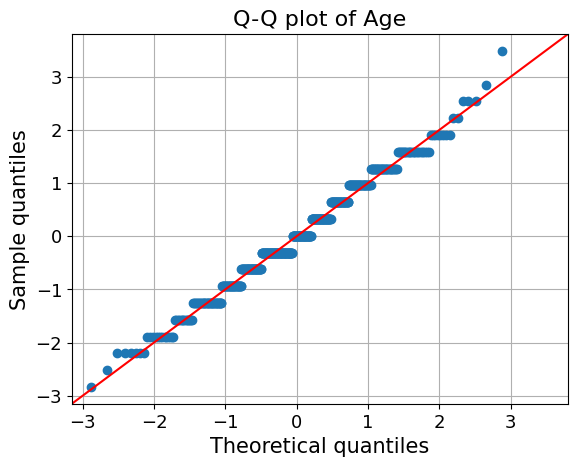

<Figure size 800x500 with 0 Axes>

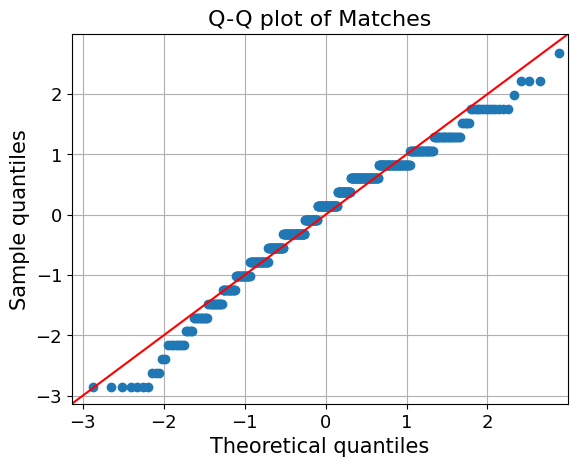

<Figure size 800x500 with 0 Axes>

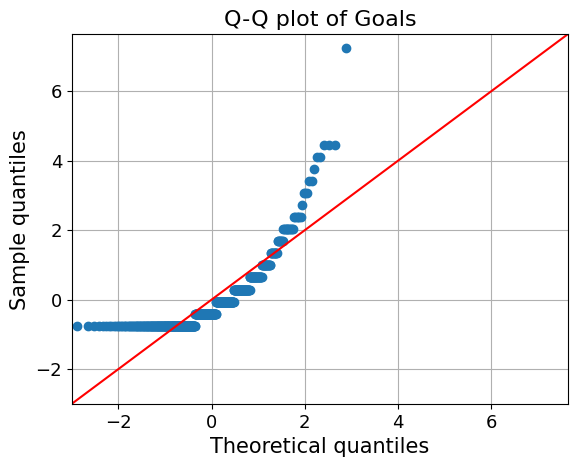

<Figure size 800x500 with 0 Axes>

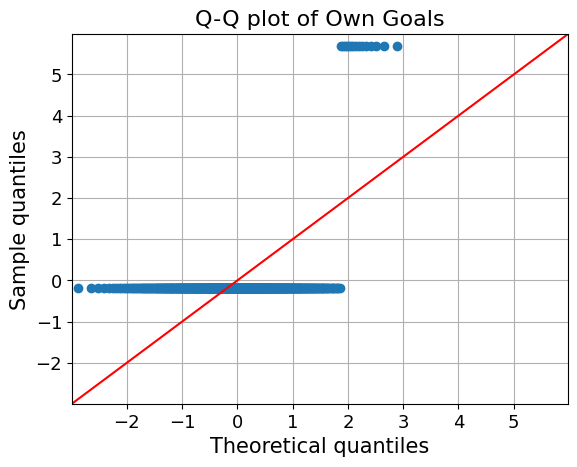

<Figure size 800x500 with 0 Axes>

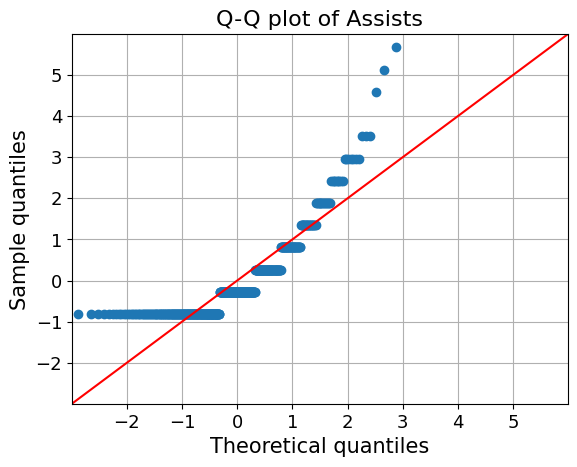

<Figure size 800x500 with 0 Axes>

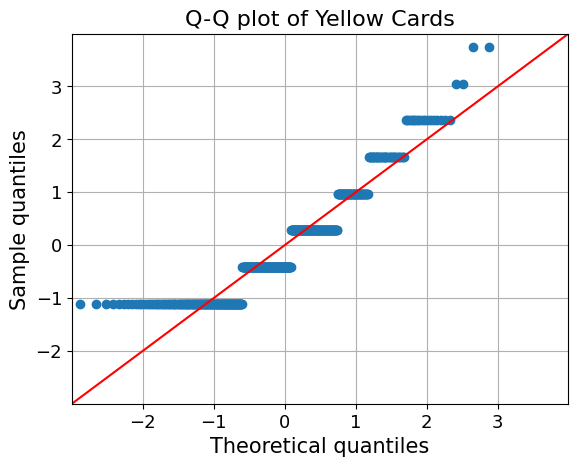

<Figure size 800x500 with 0 Axes>

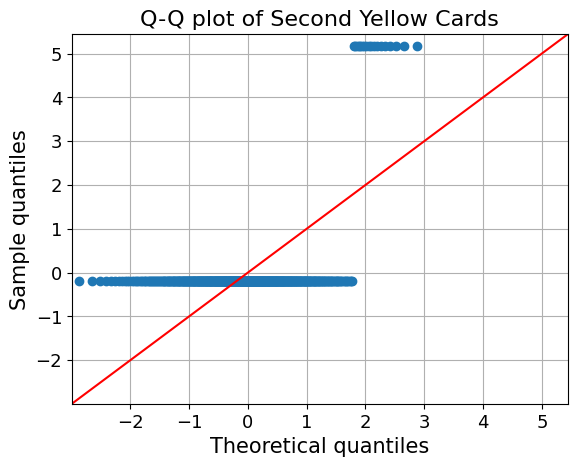

<Figure size 800x500 with 0 Axes>

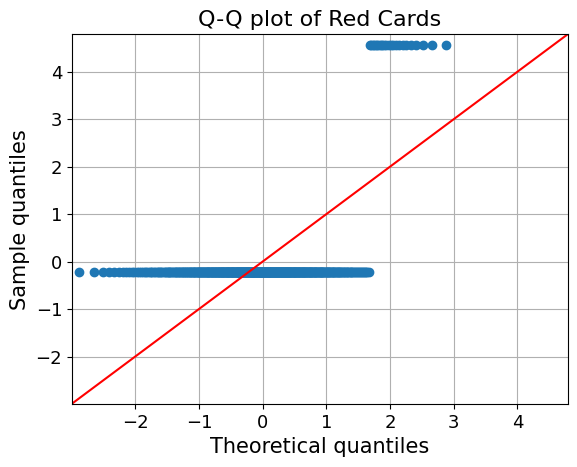

<Figure size 800x500 with 0 Axes>

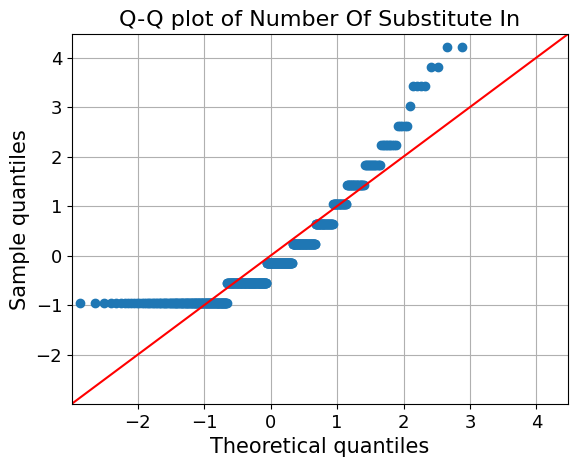

<Figure size 800x500 with 0 Axes>

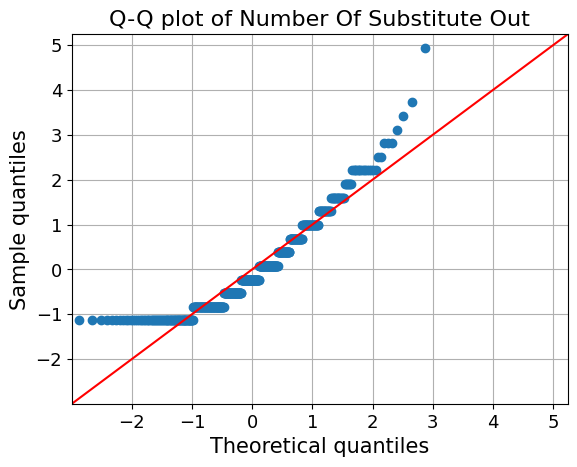

In [17]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=df[['Age', 'Matches', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards',
'Red Cards', 'Number Of Substitute In','Number Of Substitute Out']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

###Interpretation of QQ Plot

Q-Q plot is used to check the distribution of independent variables in the data set of the most expensive footballers 2021 players. The independent variables are Age, Matches, Goals, Own Goals, Assists, Yellow Cards, Second Yellow Cards, Red Cards, Number Of Substitute In, and Number Of Substitute Out.


The interpretation of each Q-Q plot can help identify whether the data set is normally distributed or not. If the data set is normally distributed, the points on the plot will follow the 45-degree line closely. If the data set is not normally distributed, the points will deviate from the 45-degree line in a systematic way as you can see for Second Yellow Cards, Red Cards, Own Goals.

<Axes: >

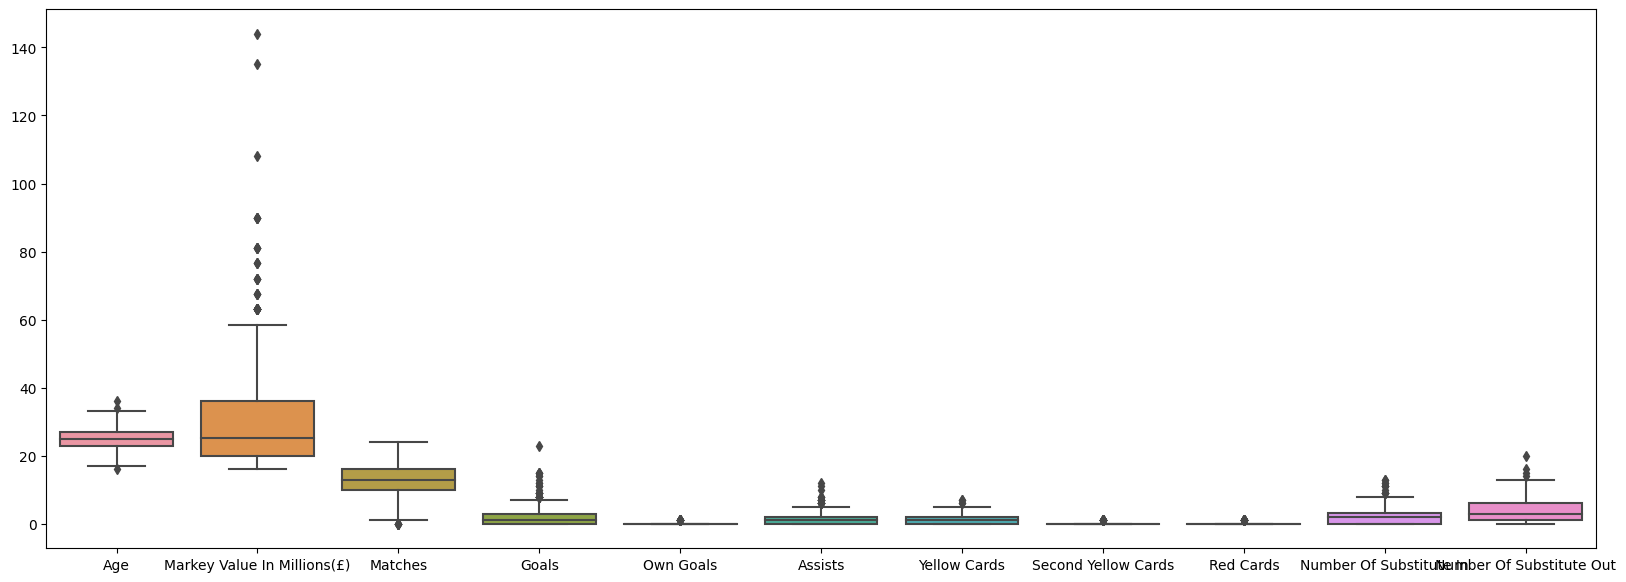

In [18]:
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

* Normalizing the data

In [19]:
numeric_df=df[['Age', 'Matches', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards',
'Red Cards', 'Number Of Substitute In','Number Of Substitute Out','Markey Value In Millions(£)']]

In [20]:


from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

names = numeric_df.columns
d = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Age,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out,Markey Value In Millions(£)
0,0.30,0.666667,0.304348,0.0,0.916667,0.428571,0.0,0.0,0.000000,0.40,1.000000
1,0.25,0.416667,0.565217,0.0,0.333333,0.142857,0.0,0.0,0.000000,0.05,0.929577
2,0.60,0.666667,0.304348,0.0,0.166667,0.285714,0.0,0.0,0.153846,0.10,0.718310
3,0.50,0.625000,0.086957,0.0,0.250000,0.142857,0.0,0.0,0.153846,0.40,0.577465
4,0.65,0.625000,0.652174,0.0,0.500000,0.142857,0.0,0.0,0.000000,0.15,0.577465


<Axes: >

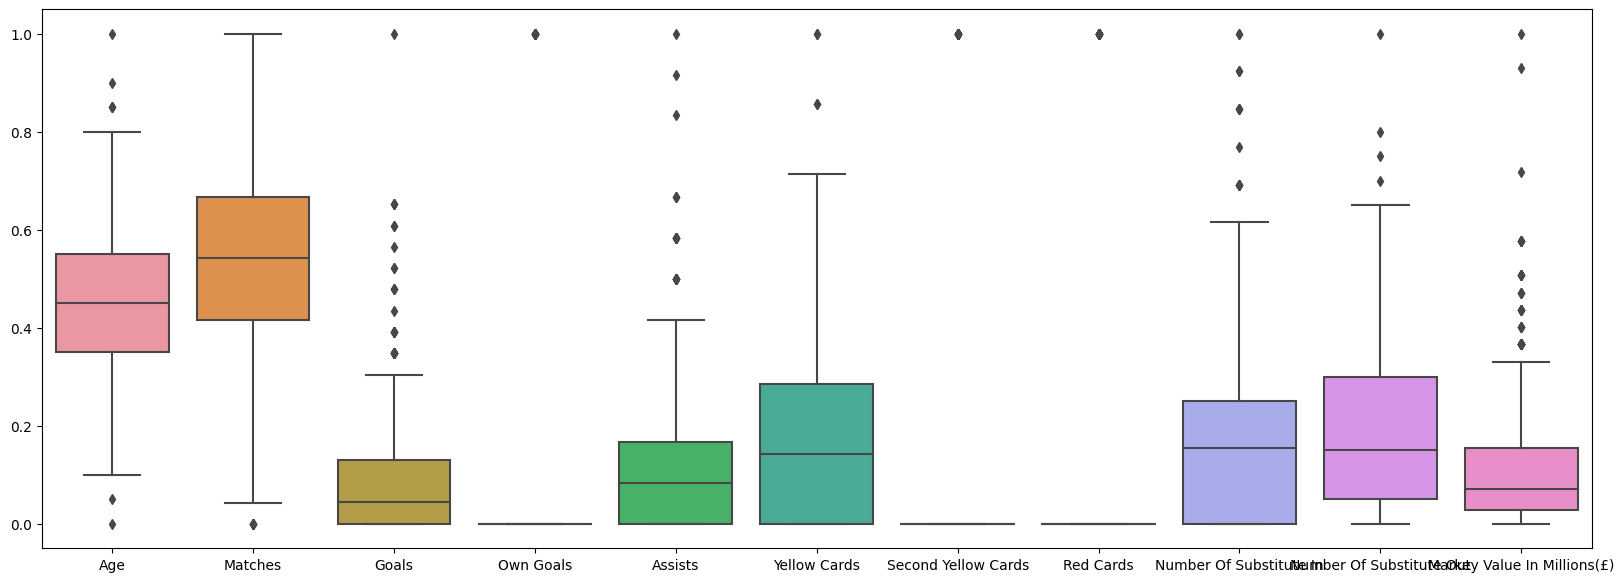

In [21]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,7))
sns.boxplot(data=scaled_df)

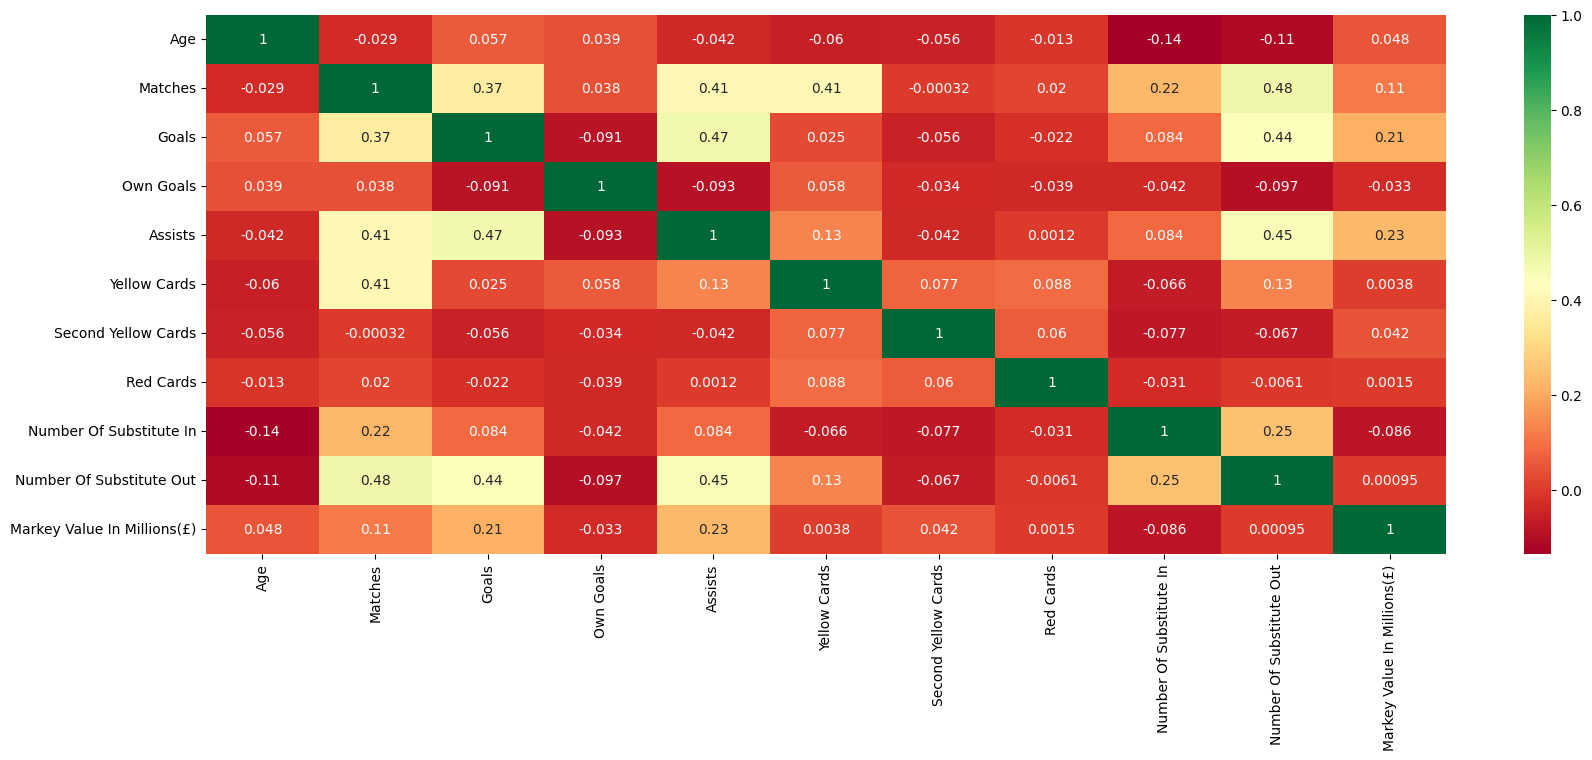

In [22]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(scaled_df.corr(), annot=True, cmap='RdYlGn')
plt.show()

* Correlation Check - I performed a correlation check on the dataset using heatmap and pirplot, the findings from it was that the didn't had any significant multi colinearity issues.

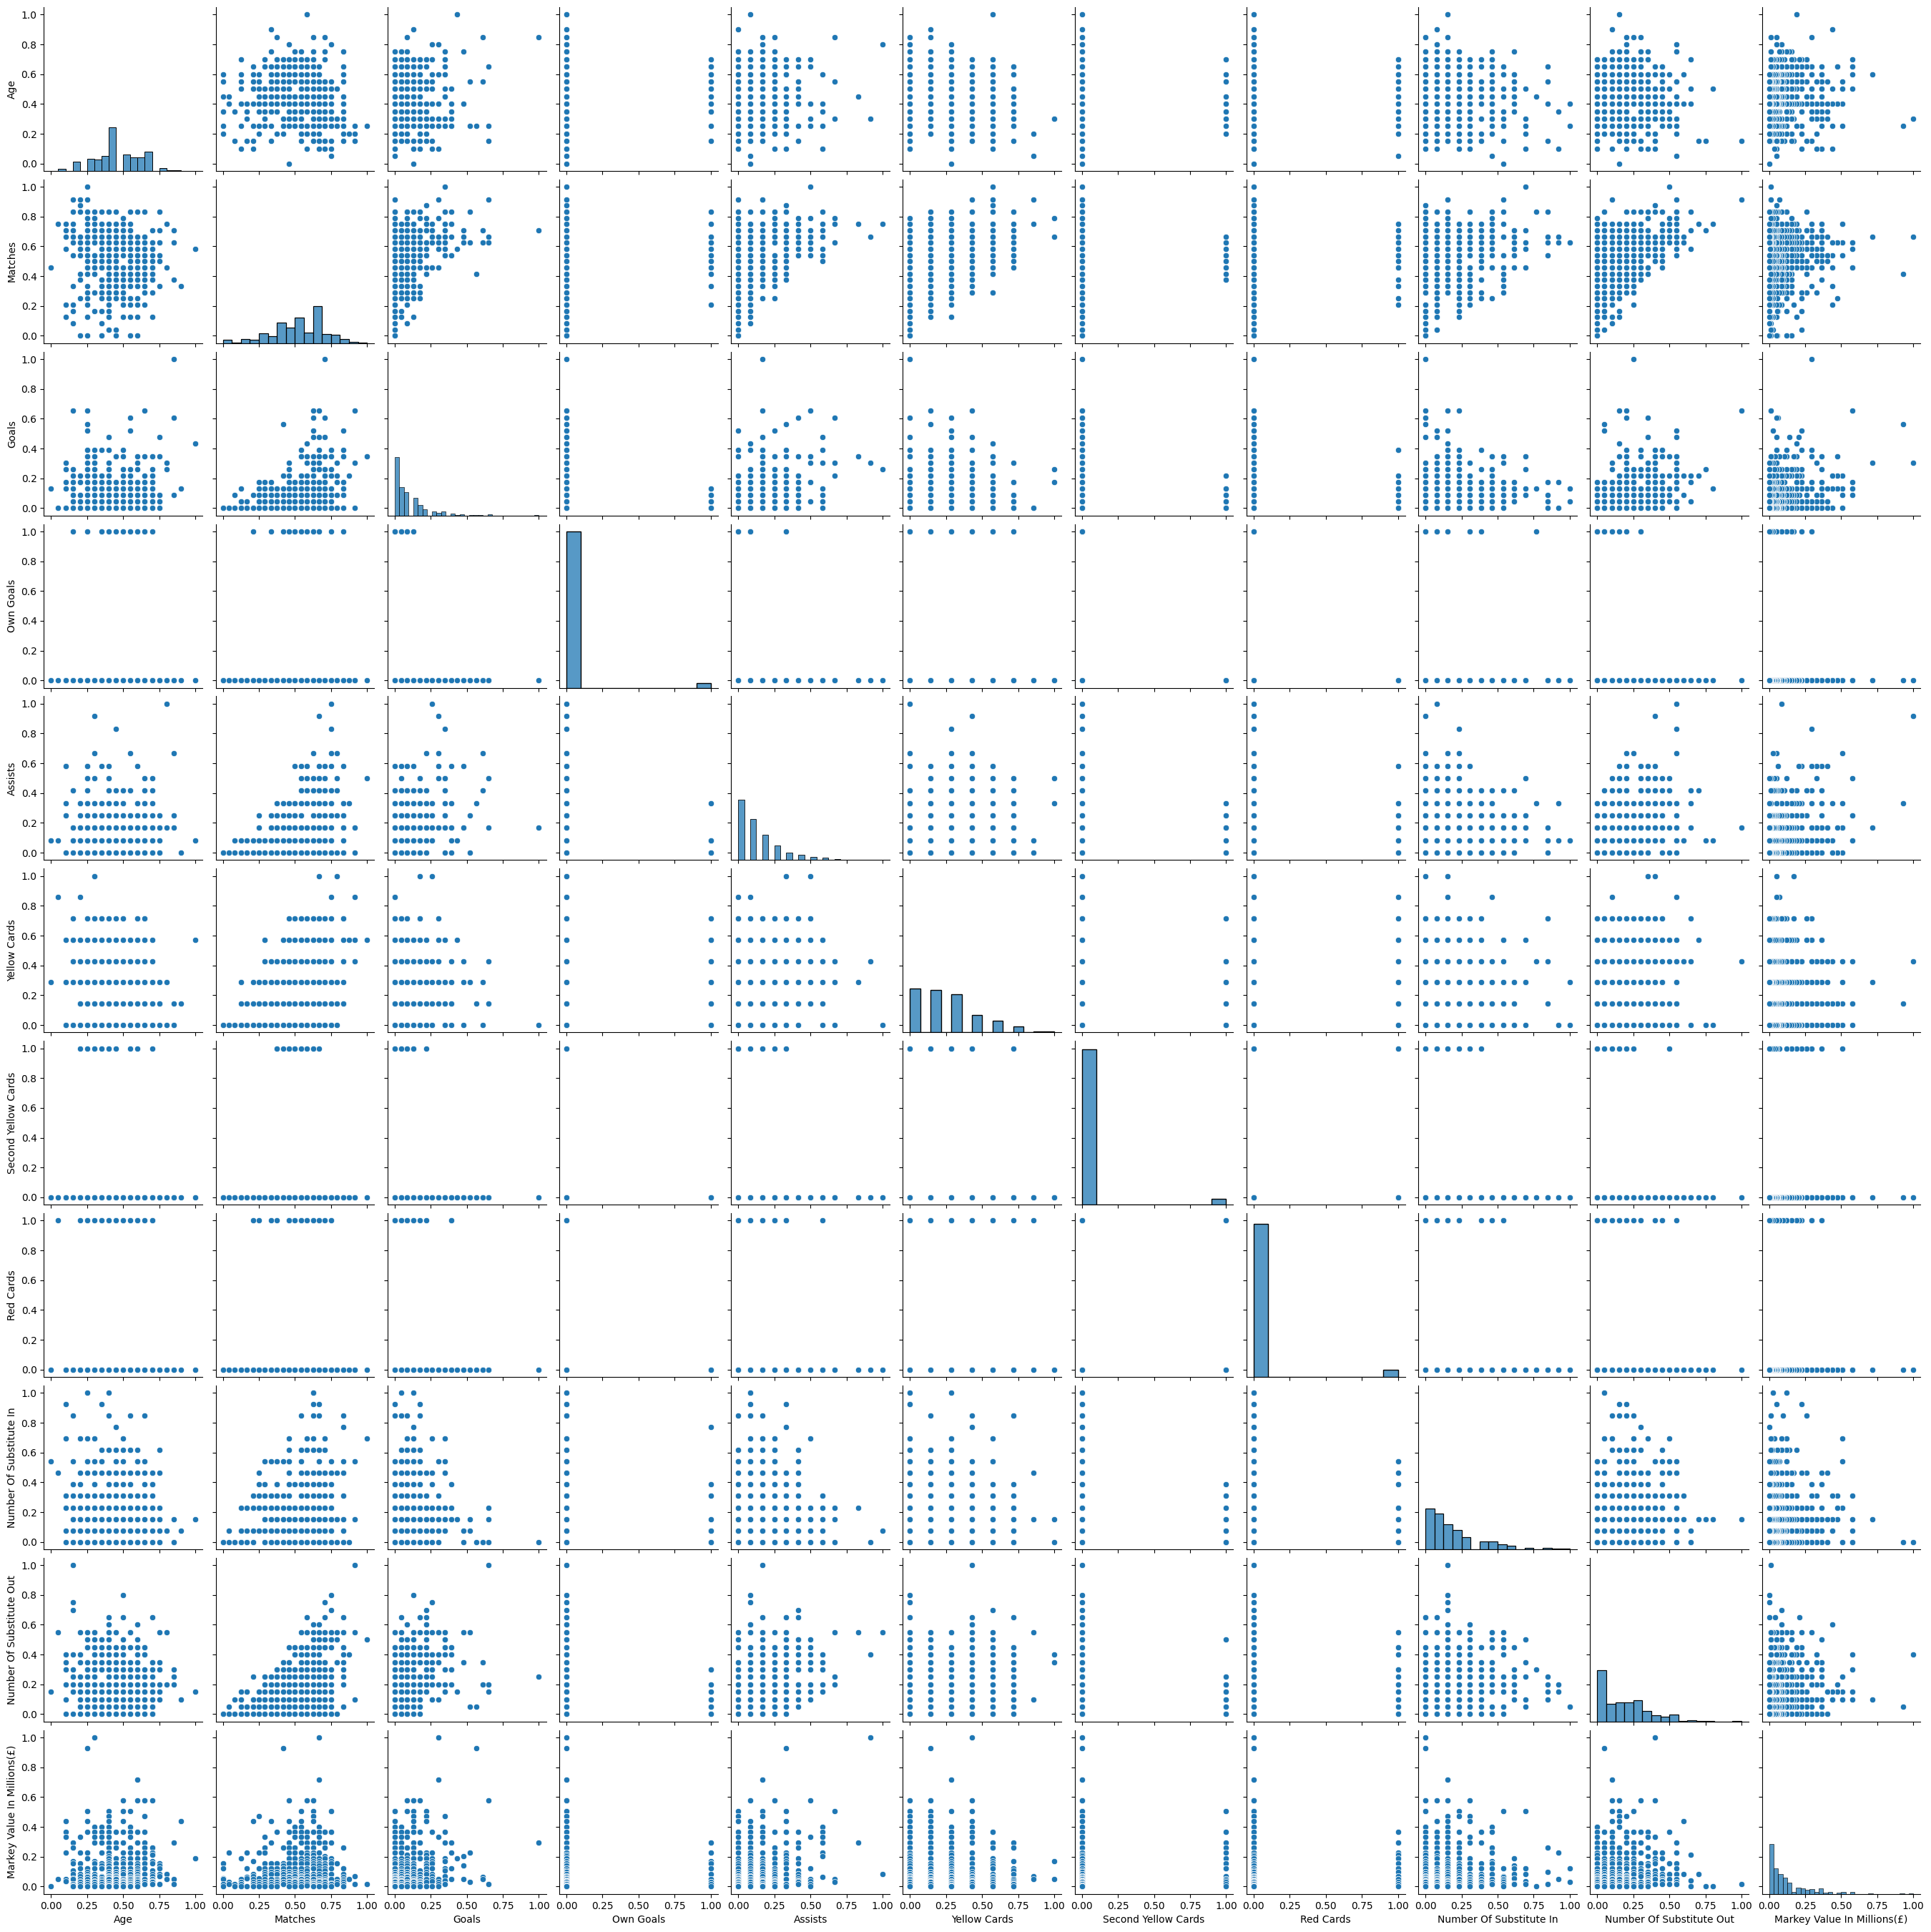

In [23]:
sns.pairplot(scaled_df) 


###Interpretation from Pair Plot

The diagonal of the pairplot shows a histogram of each variable's distribution.

The strength of the relationship can be determined by how tightly the points in the scatterplot are clustered together. If the points are tightly clustered, then the relationship is strong, meaning that there is a clear trend between the two variables. If the points are more spread out, then the relationship is weak, meaning that there is less of a trend between the two variables. So in our Pair Plot Age, Matches, Goals, Number of Substitutes out are tightly packed compared to others


#Label Encoder for Categorical Values

In [24]:
# create a LabelEncoder object
le = LabelEncoder()

# fit the encoder on the categorical column(s)
le.fit(df['Position'])

# transform the categorical values to numeric
df['Position'] = le.transform(df['Position'])

In [25]:
le = LabelEncoder()

# fit the encoder on the categorical column(s)
le.fit(df['Country'])

# transform the categorical values to numeric
df['Country'] = le.transform(df['Country'])

In [26]:
le = LabelEncoder()

# fit the encoder on the categorical column(s)
le.fit(df['Club'])

# transform the categorical values to numeric
df['Club'] = le.transform(df['Club'])

In [27]:
df_multiclass=df[['Position','Country','Club']]

# Independent variables that are useful to predict a target

In [28]:
X = df.drop("Markey Value In Millions(£)", axis=1)
y = df["Markey Value In Millions(£)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
# Create and fit the Random Forest model
rf = RandomForestRegressor(max_depth=30, random_state=5)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, random_state=5)

In [30]:
sfm = SelectFromModel(rf, threshold=0.05)
sfm.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[sfm.get_support()]
selected_features

Index(['Position', 'Age', 'Country', 'Club', 'Matches', 'Goals', 'Assists',
       'Number Of Substitute In', 'Number Of Substitute Out'],
      dtype='object')

The idea behind SelectFromModel is to use a base estimator (e.g., a machine learning model such as a linear regression, decision tree, or random forest) to fit the training data and compute feature importances.

This code is performing feature selection using scikit-learn's SelectFromModel method with a random forest classifier (rf) as the base estimator to find important feature for model training and prediction

In [31]:
univariate = SelectKBest(k=10)
univariate.fit(X_train, y_train)

# Print the results of the feature selection methods
print("Univariate Selection: ", univariate.get_support())

temp_df = pd.DataFrame()
temp_df['columns'] = X_train.columns
temp_df['values'] = univariate.get_support()
temp_df[temp_df["values"]==True]['columns']

Univariate Selection:  [False  True  True  True  True  True False  True  True False  True  True
  True]


1                          Age
2                      Country
3                         Club
4                      Matches
5                        Goals
7                      Assists
8                 Yellow Cards
10                   Red Cards
11     Number Of Substitute In
12    Number Of Substitute Out
Name: columns, dtype: object

This code is performing feature selection using scikit-learn's SelectKBest method with univariate statistical tests.

The 'k' parameter specifies the number of top features to select.

In [32]:
# Obtain the feature importances from the model
importances = rf.feature_importances_

# Sort the feature importances in descending order and obtain the indices
indices = np.argsort(importances)[::-1]

# Print the feature names and their importances
print("Feature importances:")
for i in range(X_train.shape[1]):
    print("{0}: {1}".format(X_train.columns[indices[i]], importances[indices[i]]))

Feature importances:
Club: 0.16813569632920627
Assists: 0.15845277686232032
Country: 0.10494221313984554
Age: 0.10025259679943337
Number Of Substitute Out: 0.09638823611905634
Goals: 0.08930930197090617
Matches: 0.08907527147254062
Number Of Substitute In: 0.0682423481645676
Position: 0.06381826629862118
Yellow Cards: 0.041242329390365914
Second Yellow Cards: 0.010876107211608454
Red Cards: 0.006895268639600157
Own Goals: 0.002369587601928268


This code is computing and printing the feature importances of a random forest model (rf) that has been fit to the training data.

The rf.feature_importances_ attribute returns an array of feature importances, with each element corresponding to a feature in the input data.

The np.argsort(importances)[::-1] line sorts the importances in descending order and returns the indices of the sorted importances. The [::-1] slice notation is used to reverse the order of the indices so that they are in descending order.

#Ranges of Predictor variables

In [33]:
df.describe()

,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.444000,24.968000,31.537800,24.13400,36.880000,12.396000,2.160000,0.030000,1.51200,1.592000,0.036000,0.046000,2.394000,3.744000
std,3.555862,3.165916,17.577697,15.73172,23.190887,4.342453,2.880102,0.170758,1.85276,1.445585,0.186477,0.209695,2.517825,3.293046
min,0.000000,16.000000,16.200000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,19.800000,14.00000,14.000000,10.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,25.000000,25.200000,17.00000,40.000000,13.000000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,2.000000,3.000000
75%,7.000000,27.000000,36.000000,39.00000,54.000000,16.000000,3.000000,0.000000,2.00000,2.000000,0.000000,0.000000,3.250000,6.000000
max,12.000000,36.000000,144.000000,56.00000,80.000000,24.000000,23.000000,1.000000,12.00000,7.000000,1.000000,1.000000,13.000000,20.000000


#Distribution of predictor variables

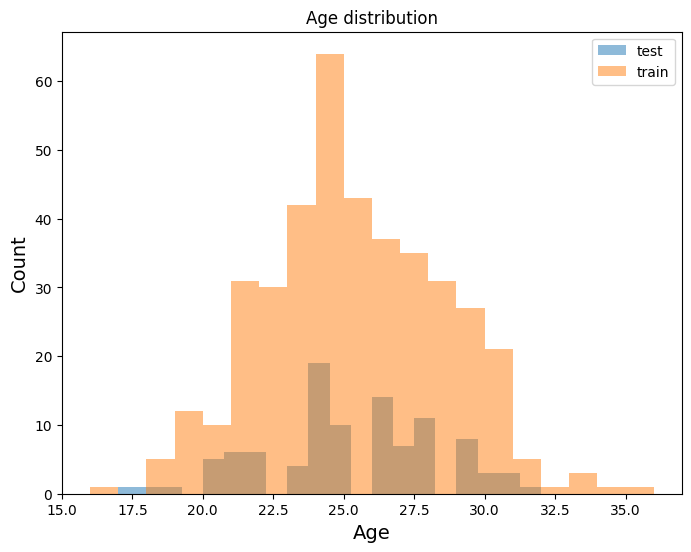

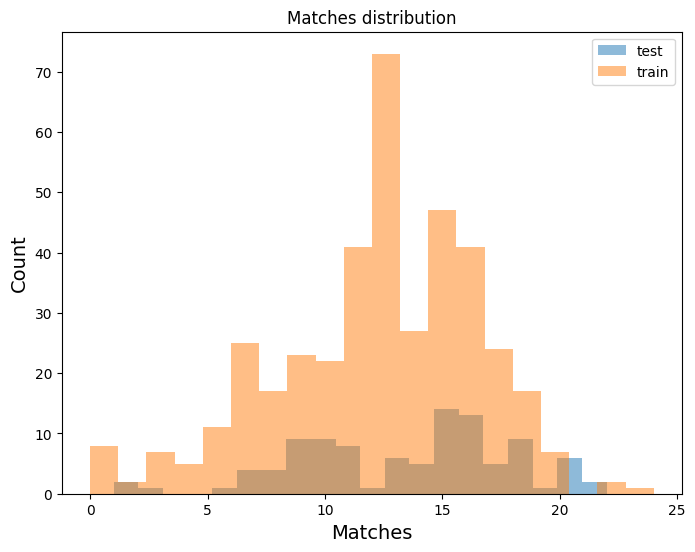

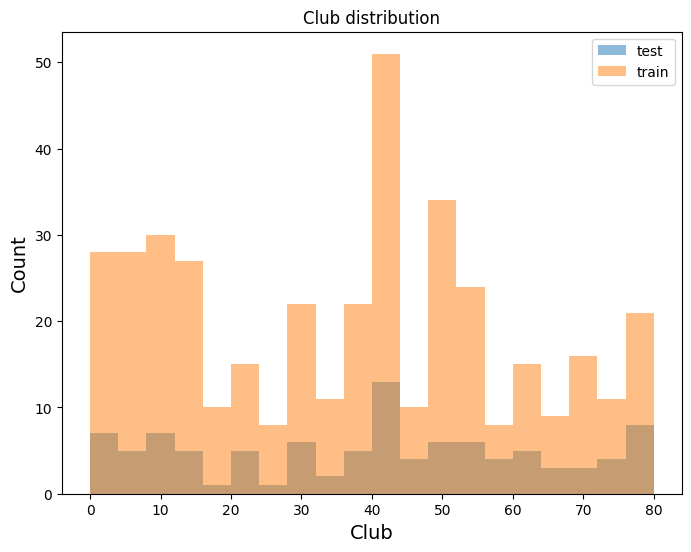

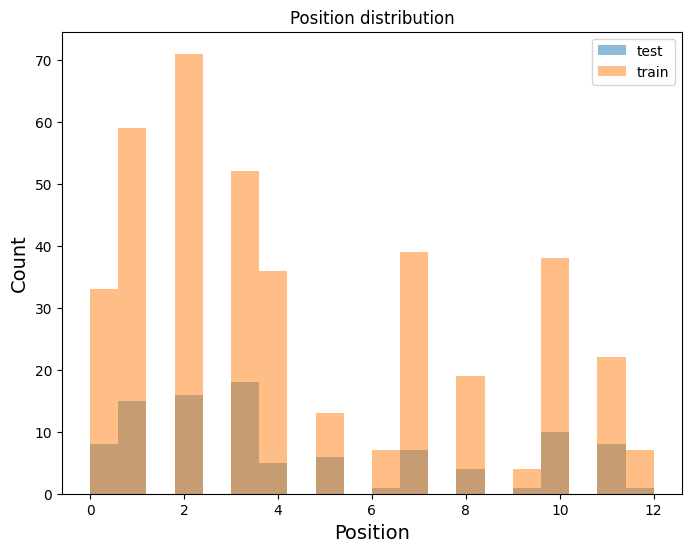

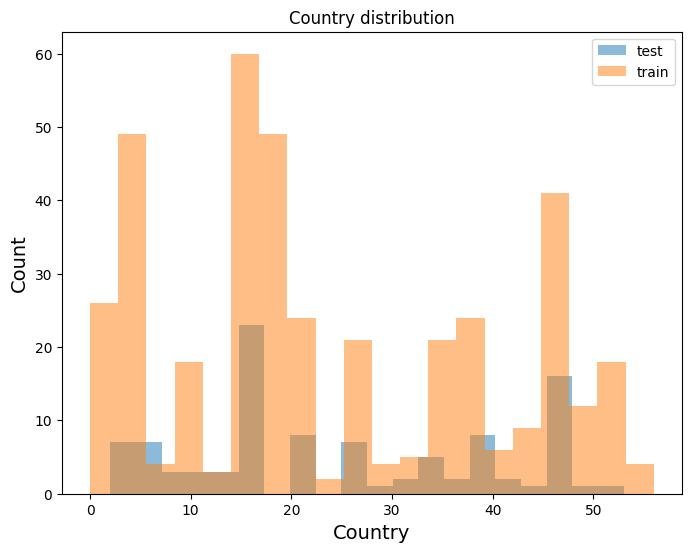

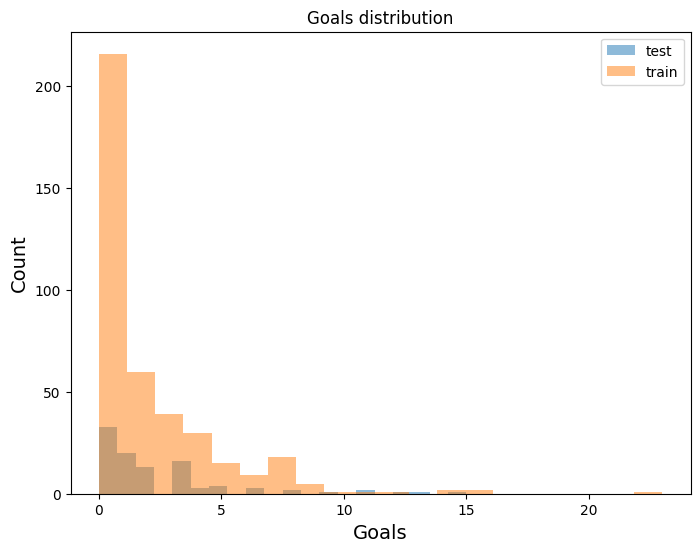

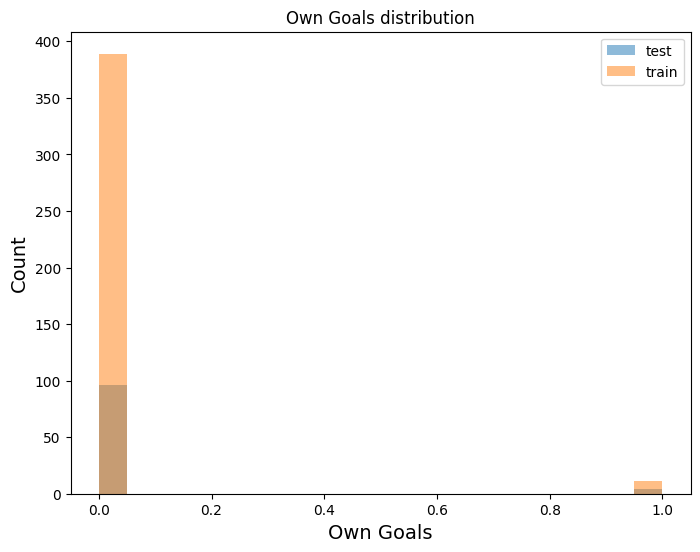

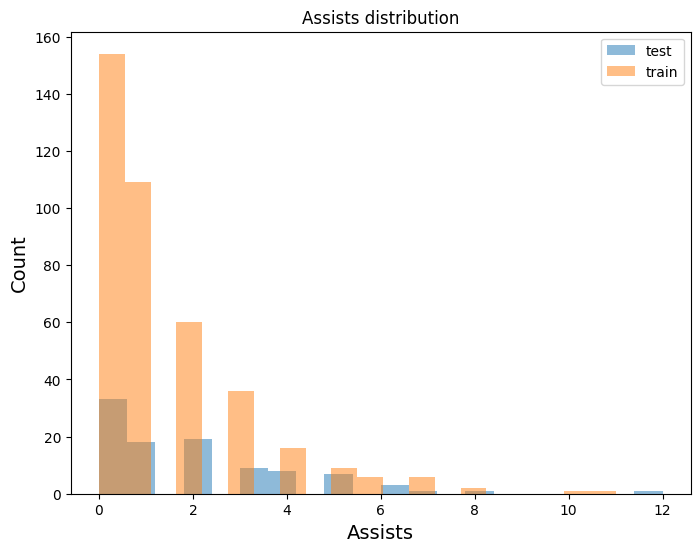

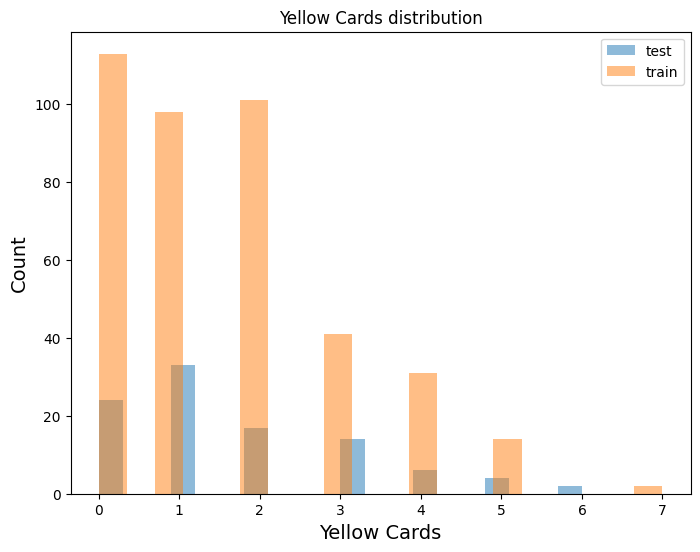

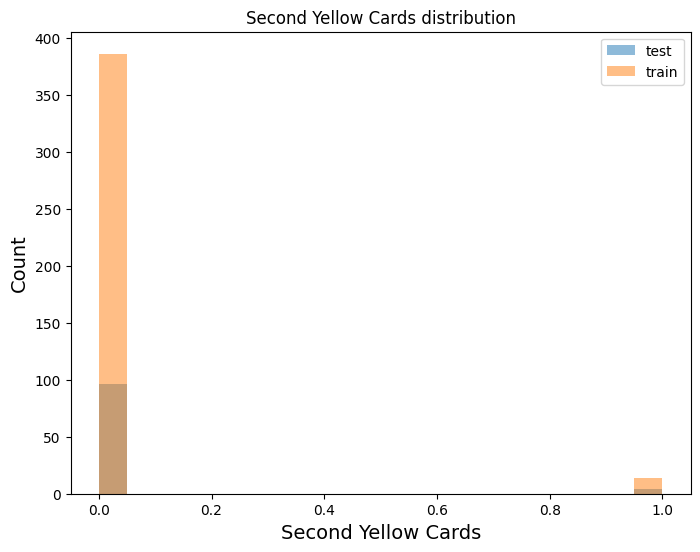

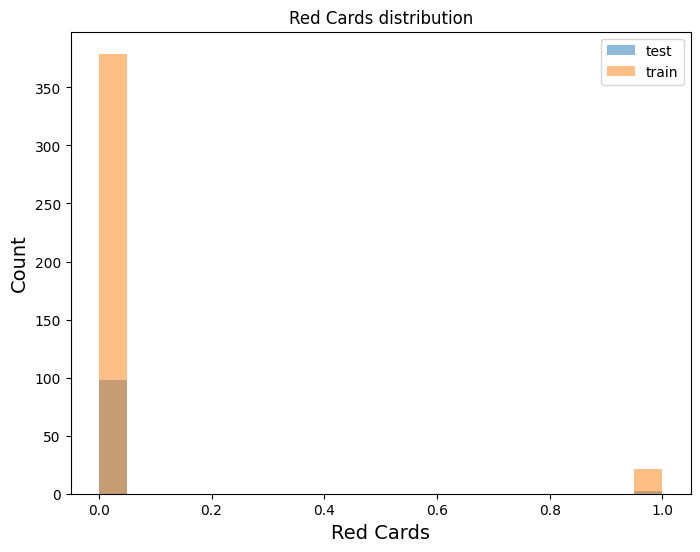

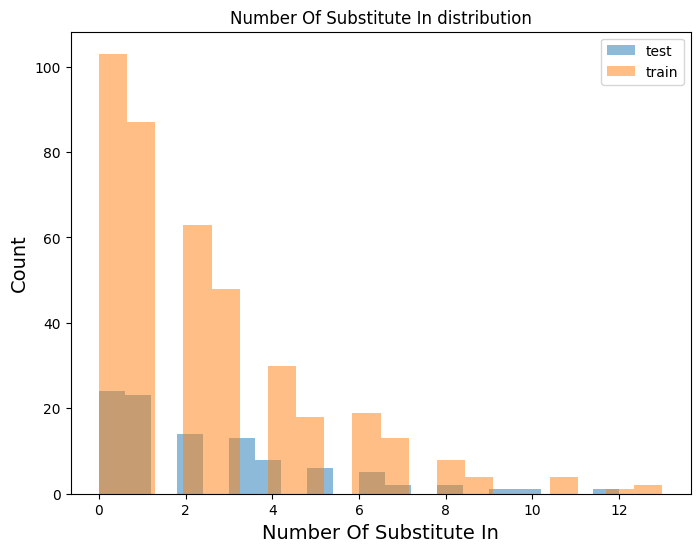

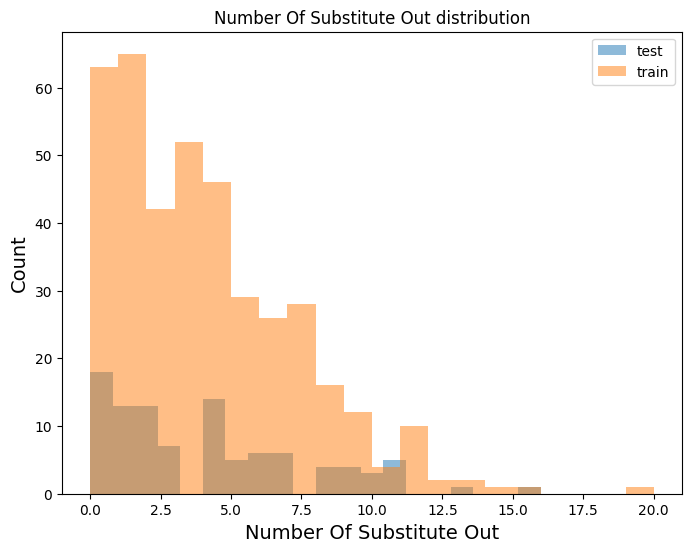

In [34]:
X_test_plot = X_test[['Age', 'Matches','Club','Position','Country', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards',
                      'Red Cards', 'Number Of Substitute In','Number Of Substitute Out']]


X_train_plot = X_train[['Age', 'Matches','Club','Position','Country', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards',
                      'Red Cards', 'Number Of Substitute In','Number Of Substitute Out']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

For each feature, the code plots two histograms side by side - one for the training dataset and another for the testing dataset. The histograms show the distribution of values for each feature. This can help identify any significant differences in the distribution of values between the training and testing datasets, which could affect the performance of the model.

#With Outliers

In [35]:
#with outliers

regr = linear_model.LinearRegression()

regr.fit(X_train,y_train)

y_pred = regr.predict(X_train)
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)

Coefficient of determination: 0.12
R^2 score on training set = 0.11520593264113499


#Without Outliers

In [36]:
z_score = (scaled_df - scaled_df.mean()) / scaled_df.std()
z_score

,Age,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out,Markey Value In Millions(£)
0,-0.937485,0.829946,1.680496,-0.175687,5.121007,0.974000,-0.193054,-0.219366,-0.950821,1.292420,6.398005
1,-1.253350,-0.551762,3.763755,-0.175687,1.342861,-0.409523,-0.193054,-0.219366,-0.950821,-0.833271,5.885993
2,0.957701,0.829946,1.680496,-0.175687,0.263391,0.282239,-0.193054,-0.219366,-0.156484,-0.529601,4.349956
3,0.325972,0.599661,-0.055554,-0.175687,0.803126,-0.409523,-0.193054,-0.219366,-0.156484,1.292420,3.325931
4,1.273565,0.599661,4.458175,-0.175687,2.422331,-0.409523,-0.193054,-0.219366,-0.950821,-0.225931,3.325931
...,...,...,...,...,...,...,...,...,...,...,...
495,0.641836,-2.854608,-0.749973,-0.175687,-0.816080,-1.101284,-0.193054,-0.219366,-0.950821,-1.136941,-0.872572
496,0.957701,-1.012331,-0.402763,-0.175687,0.803126,-1.101284,-0.193054,4.549467,-0.156484,0.381410,-0.872572
497,-0.305757,-1.703185,-0.749973,-0.175687,-0.816080,-1.101284,-0.193054,-0.219366,-0.950821,-1.136941,-0.872572
498,0.010108,-1.012331,-0.749973,-0.175687,-0.816080,0.282239,-0.193054,-0.219366,-0.950821,-0.529601,-0.872572


In [37]:
outliers = scaled_df[abs(z_score) > 3]

In [38]:
data_without_outliers = pd.DataFrame(scaled_df[abs(z_score) <= 3].copy())

In [39]:
data_without_outliers.dropna(axis=0, how='any', inplace=True)

In [40]:
X = data_without_outliers.drop("Markey Value In Millions(£)", axis=1)
y = data_without_outliers["Markey Value In Millions(£)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regr = linear_model.LinearRegression()

regr.fit(X_train,y_train)

y_pred = regr.predict(X_train)
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Coefficient of determination: 0.03
R^2 score on tarining set = 0.025689431303901444


This code performs outlier detection and removal using z-scores and fits a linear regression model to the cleaned data to make predictions. The R-squared score is used to evaluate the performance of the model on the training set with performance of model with outliers. As you can see from R^2, model performed better with outliers


#Imputation Methods

*  Remove 1%, 5%, and 10% of your data randomly

In [41]:
def create_random_data(data, fraction):
  df1 = data.copy()
  random_integers = random.sample(range(0, len(df1)), int(fraction*len(df1)))
  for i in random_integers:
    df1.iloc[i] = np.nan
  df1.columns = data.columns
  return df1

In [42]:
def linear_reg(data):
  X = data.drop("Markey Value In Millions(£)", axis=1)
  y = data["Markey Value In Millions(£)"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  reg = LinearRegression().fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = reg.predict(X_test)

  # Calculate the MSE between the actual and predicted values
  mse = mean_squared_error(y_test, y_pred)

  # Calculate the mean squared error of the residuals
  residual_mse = mean_squared_error(y_test, y_pred - y_test)

  #Calculate mean percentage error on residuals
  # Calculate the residuals
  residuals = y_test - y_pred

  # Calculate the absolute percentage error for each residual
  abs_percent_errors = np.abs(residuals / y_test * 100)

  # Calculate the mean percentage error (MPE)
  mpe = np.mean(abs_percent_errors)

  # Calculate the bias and variance of the error
  bias = mse - residual_mse
  variance = residual_mse

  return mse, residual_mse,mpe, bias, variance

In [43]:
mse, residual_mse,mpe, bias, variance = linear_reg(df)
mse, residual_mse,mpe, bias, variance

(308.813972907369,
 1977.485251752618,
 46.02098254983886,
 -1668.6712788452492,
 1977.485251752618)

### MEAN Imputation

In [44]:
data_1percent_removed = create_random_data(df, 0.01)
mean_imp1 = SimpleImputer(strategy='mean')
df_mean_1percent = mean_imp1.fit_transform(data_1percent_removed)
df_mean_1percent = pd.DataFrame(df_mean_1percent, columns=data_1percent_removed.columns)
linear_reg(df_mean_1percent)

(307.7290121357661,
 1980.271505262274,
 45.68015713403542,
 -1672.542493126508,
 1980.271505262274)

In [45]:
data_5percent_removed = create_random_data(df, 0.05)
mean_imp5 = SimpleImputer(strategy='mean')
df_mean_5percent = mean_imp5.fit_transform(data_5percent_removed)
df_mean_5percent = pd.DataFrame(df_mean_5percent, columns=data_5percent_removed.columns)
linear_reg(df_mean_5percent)

(304.1425747026028,
 1981.939014654142,
 43.903947564591725,
 -1677.7964399515392,
 1981.939014654142)

In [46]:
data_10percent_removed = create_random_data(df, 0.10)
mean_imp10 = SimpleImputer(strategy='mean')
df_mean_10percent = mean_imp10.fit_transform(data_10percent_removed)
df_mean_10percent = pd.DataFrame(df_mean_10percent, columns=data_10percent_removed.columns)
linear_reg(df_mean_10percent)

(299.643751512676,
 1978.5749194142286,
 44.66745897881793,
 -1678.9311679015527,
 1978.5749194142286)

### Median Imputation

In [47]:
data_1percent_removed = create_random_data(df, 0.01)
median_imp1 = SimpleImputer(strategy='median')
df_median_1percent = median_imp1.fit_transform(data_1percent_removed)
df_median_1percent = pd.DataFrame(df_median_1percent, columns=data_1percent_removed.columns)
linear_reg(df_median_1percent)

(311.5701305116586,
 1973.6693740989292,
 46.52370546309028,
 -1662.0992435872706,
 1973.6693740989292)

In [48]:
data_5percent_removed = create_random_data(df, 0.05)
median_imp5 = SimpleImputer(strategy='median')
df_median_5percent = median_imp5.fit_transform(data_5percent_removed)
df_median_5percent = pd.DataFrame(df_median_5percent, columns=data_5percent_removed.columns)
linear_reg(df_median_5percent)

(296.16433900053636,
 1974.123949157379,
 43.028284584914566,
 -1677.9596101568427,
 1974.123949157379)

In [49]:
data_10percent_removed = create_random_data(df, 0.10)
median_imp10 = SimpleImputer(strategy='median')
df_median_10percent = median_imp10.fit_transform(data_10percent_removed)
df_median_10percent = pd.DataFrame(df_median_10percent, columns=data_10percent_removed.columns)
linear_reg(df_median_10percent)

(289.4409248166312,
 1998.0473134930185,
 42.19501465965182,
 -1708.6063886763873,
 1998.0473134930185)

### KNN Imputation

In [50]:
data_1percent_removed = create_random_data(df, 0.01)
knn_imp1 = KNNImputer()
df_knn_1percent = knn_imp1.fit_transform(data_1percent_removed)
df_knn_1percent = pd.DataFrame(df_knn_1percent, columns=data_1percent_removed.columns)
linear_reg(df_knn_1percent)

(309.69288778692425,
 1977.390737635513,
 45.93439640966557,
 -1667.6978498485887,
 1977.390737635513)

In [51]:
data_5percent_removed = create_random_data(df, 0.05)
knn_imp5 = KNNImputer()
df_knn_5percent = knn_imp1.fit_transform(data_5percent_removed)
df_knn_5percent = pd.DataFrame(df_knn_5percent, columns=data_5percent_removed.columns)
linear_reg(df_knn_5percent)

(281.40822246261223,
 1844.9819930438496,
 42.027640970826184,
 -1563.5737705812373,
 1844.9819930438496)

In [52]:
data_10percent_removed = create_random_data(df, 0.10)
knn_imp10 = KNNImputer()
df_knn_10percent = knn_imp10.fit_transform(data_10percent_removed)
df_knn_10percent = pd.DataFrame(df_knn_10percent, columns=data_10percent_removed.columns)
linear_reg(df_knn_10percent)

(287.5793836884159,
 1999.782056461032,
 39.60551642691628,
 -1712.202672772616,
 1999.782056461032)

###Interpreting the Imputation Methods

From the above readings we can conclude that the all the three imputation methods work almost same.

We can also observe that the % error of residuals decrease as the missing data points increase. This is because missing data points tend to have larger residuals, which can inflate the MPE when there are only a few missing data points. However, as the number of missing data points increases, the impact of these outliers on the overall MPE decreases.

#Identifying Predictor significance


In [53]:
df = pd.concat([scaled_df, df_multiclass], axis=1, join='inner')

In [54]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df['Markey Value In Millions(£)'], df[['Age','Club','Position','Country', 'Matches', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards',
                      'Red Cards', 'Number Of Substitute In','Number Of Substitute Out']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Markey Value In Millions(£)   R-squared (uncentered):                   0.483
Model:                                     OLS   Adj. R-squared (uncentered):              0.469
Method:                          Least Squares   F-statistic:                              34.94
Date:                         Mon, 10 Apr 2023   Prob (F-statistic):                    1.95e-61
Time:                                 03:36:21   Log-Likelihood:                          305.93
No. Observations:                          500   AIC:                                     -585.9
Df Residuals:                              487   BIC:                                     -531.1
Df Model:                                   13                                                  
Covariance Type:                     nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                          0.0915      0.030      3.002      0.003       0.032       0.151
Club                         0.0001      0.000      0.552      0.581      -0.000       0.001
Position                    -0.0006      0.002     -0.345      0.730      -0.004       0.003
Country                      0.0003      0.000      0.883      0.378      -0.000       0.001
Matches                      0.1335      0.039      3.415      0.001       0.057       0.210
Goals                        0.1677      0.058      2.914      0.004       0.055       0.281
Own Goals                   -0.0150      0.036     -0.421      0.674      -0.085       0.055
Assists                      0.1849      0.047      3.907      0.000       0.092       0.278
Yellow Cards                -0.0333      0.033     -1.014      0.311      -0.098       0.031
Second Yellow Cards          0.0407      0.032      1.260      0.208      -0.023       0.104
Red Cards                    0.0023      0.029      0.082      0.935      -0.054       0.059
Number Of Substitute In     -0.0485      0.033     -1.483      0.139      -0.113       0.016
Number Of Substitute Out    -0.1480      0.046     -3.207      0.001      -0.239      -0.057
==============================================================================
Omnibus:                      178.244   Durbin-Watson:                   0.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.968
Skew:                           1.655   Prob(JB):                    7.08e-132
Kurtosis:                       7.247   Cond. No.                         515.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value helps to determine if the observed results are statistically significant or if they occurred by chance. Typically, a significance level of 0.05 (or 5%) is used as a cutoff value for determining statistical significance. If the p-value is less than the significance level, the null hypothesis is rejected, and it is concluded that the observed results are statistically significant. If the p-value is greater than the significance level, the null hypothesis cannot be rejected, and it is concluded that the observed results are not statistically significant.

Features in our dataset with P value < 0.05
* Age
* Matches
* Goals
* Assists
* Number Of Substitute Out

Lets consider only these features and calculate the model fit again, and then lets have a comparative analysis of both models.





In [55]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df['Markey Value In Millions(£)'], df[['Age', 'Matches', 'Goals',  'Assists', 'Number Of Substitute Out']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Markey Value In Millions(£)   R-squared (uncentered):                   0.476
Model:                                     OLS   Adj. R-squared (uncentered):              0.471
Method:                          Least Squares   F-statistic:                              89.95
Date:                         Mon, 10 Apr 2023   Prob (F-statistic):                    3.24e-67
Time:                                 03:36:21   Log-Likelihood:                          302.80
No. Observations:                          500   AIC:                                     -595.6
Df Residuals:                              495   BIC:                                     -574.5
Df Model:                                    5                                                  
Covariance Type:                     nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                          0.1032      0.027      3.769      0.000       0.049       0.157
Matches                      0.1142      0.031      3.717      0.000       0.054       0.175
Goals                        0.1738      0.057      3.070      0.002       0.063       0.285
Assists                      0.1836      0.047      3.925      0.000       0.092       0.276
Number Of Substitute Out    -0.1547      0.045     -3.452      0.001      -0.243      -0.067
==============================================================================
Omnibus:                      180.912   Durbin-Watson:                   0.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.222
Skew:                           1.680   Prob(JB):                    9.38e-135
Kurtosis:                       7.283   Cond. No.                         7.77
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* R-squared is a measure of how well the model fits the data, with higher values indicating better fit. A model with a higher R-squared value is generally preferred.



* From the above two summaries we can interpret that after selecting only the significant features(features with P value less than 0.05) it had little to no effect on the outcome compare to the model which uses all the features, as you can clearly see R^2 being same for Significant Features so we are Going to stick to data with all features for different models

In [56]:
features = pd.concat([scaled_df[['Age','Matches', 'Goals', 'Own Goals', 'Assists',
                       'Yellow Cards','Second Yellow Cards','Red Cards',
                       'Number Of Substitute In', 'Number Of Substitute Out']],df_multiclass], axis = 1, join = 'inner')

In [57]:
target = scaled_df["Markey Value In Millions(£)"]

#Split data into Train and Test

* The data was splitted into Training ad Testing Data into 90% and 10% respectively.


In [58]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=25)


In [59]:
!pip install shap
import shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
X_train_100 = shap.utils.sample(
    X_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
X_test_100 = shap.utils.sample(
    X_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process

#Model Interpretability

###Linear Model

In [61]:
import statsmodels.api as sm

lin_reg = sm.OLS(y_train,X_train).fit()

In [62]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Markey Value In Millions(£)   R-squared (uncentered):                   0.485
Model:                                     OLS   Adj. R-squared (uncentered):              0.470
Method:                          Least Squares   F-statistic:                              31.67
Date:                         Mon, 10 Apr 2023   Prob (F-statistic):                    5.44e-55
Time:                                 03:36:26   Log-Likelihood:                          270.75
No. Observations:                          450   AIC:                                     -515.5
Df Residuals:                              437   BIC:                                     -462.1
Df Model:                                   13                                                  
Covariance Type:                     nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                          0.0848      0.032      2.610      0.009       0.021       0.149
Matches                      0.1218      0.041      2.936      0.003       0.040       0.203
Goals                        0.1738      0.061      2.835      0.005       0.053       0.294
Own Goals                   -0.0056      0.037     -0.149      0.882      -0.079       0.068
Assists                      0.1982      0.050      3.959      0.000       0.100       0.297
Yellow Cards                -0.0155      0.036     -0.433      0.665      -0.086       0.055
Second Yellow Cards          0.0421      0.035      1.216      0.225      -0.026       0.110
Red Cards                    0.0120      0.032      0.377      0.706      -0.051       0.075
Number Of Substitute In     -0.0470      0.035     -1.335      0.183      -0.116       0.022
Number Of Substitute Out    -0.1605      0.050     -3.213      0.001      -0.259      -0.062
Position                    -0.0004      0.002     -0.200      0.841      -0.004       0.003
Country                      0.0004      0.000      1.096      0.274      -0.000       0.001
Club                         0.0002      0.000      0.628      0.530      -0.000       0.001
==============================================================================
Omnibus:                      157.973   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              519.610
Skew:                           1.623   Prob(JB):                    1.47e-113
Kurtosis:                       7.144   Cond. No.                         519.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#Predicting the values
lr_pred = lin_reg.predict(X_test)

In [64]:
from sklearn.metrics import mean_absolute_error


In [65]:
#Checking accuracy of predictions

print('Linear Model - Test')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

Linear Model - Test
MAE: 0.085034
RMSE: 0.119687
R2 0.070587



###TREE BASED MODELS

In [66]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(max_depth=3, random_state=1234)
DTree.fit(X_train,y_train)

DTree_score = DTree.score(X_test, y_test)
print(DTree_score)

-0.5048833669586636


In [67]:
from sklearn.metrics import r2_score,mean_absolute_error
def model_sel(model):
    y_pred = model.predict(X_test)
    print("MODEL EVALUATION")
    print("\nr2_score of the model: ")
    print(r2_score(y_test,y_pred))

In [68]:
# Model Evaluation on DecisionTreeRegressor
print("DECISION TREE REGRESSION: ")
print("-x"*30)
model_sel(DTree)

DECISION TREE REGRESSION: 
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
MODEL EVALUATION

r2_score of the model: 
-0.5048833669586636


In [69]:
prediction_tree = DTree.predict(X_test)


In [70]:
#Checking accuracy of predictions
print('Decision tree')
print('MAE: %f'% mean_absolute_error(y_test, prediction_tree))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, prediction_tree)))   
print('R2 %f' % r2_score(y_test, prediction_tree))

Decision tree
MAE: 0.112138
RMSE: 0.152297
R2 -0.504883


[Text(0.5, 0.875, 'Goals <= 0.109\nsquared_error = 0.019\nsamples = 450\nvalue = 0.122'),
 Text(0.25, 0.625, 'Club <= 54.5\nsquared_error = 0.012\nsamples = 310\nvalue = 0.102'),
 Text(0.125, 0.375, 'Assists <= 0.292\nsquared_error = 0.014\nsamples = 243\nvalue = 0.113'),
 Text(0.0625, 0.125, 'squared_error = 0.013\nsamples = 231\nvalue = 0.108'),
 Text(0.1875, 0.125, 'squared_error = 0.015\nsamples = 12\nvalue = 0.211'),
 Text(0.375, 0.375, 'Position <= 2.5\nsquared_error = 0.004\nsamples = 67\nvalue = 0.06'),
 Text(0.3125, 0.125, 'squared_error = 0.006\nsamples = 21\nvalue = 0.099'),
 Text(0.4375, 0.125, 'squared_error = 0.002\nsamples = 46\nvalue = 0.042'),
 Text(0.75, 0.625, 'Number Of Substitute Out <= 0.175\nsquared_error = 0.032\nsamples = 140\nvalue = 0.167'),
 Text(0.625, 0.375, 'Goals <= 0.5\nsquared_error = 0.049\nsamples = 41\nvalue = 0.243'),
 Text(0.5625, 0.125, 'squared_error = 0.036\nsamples = 39\nvalue = 0.217'),
 Text(0.6875, 0.125, 'squared_error = 0.031\nsamples = 2

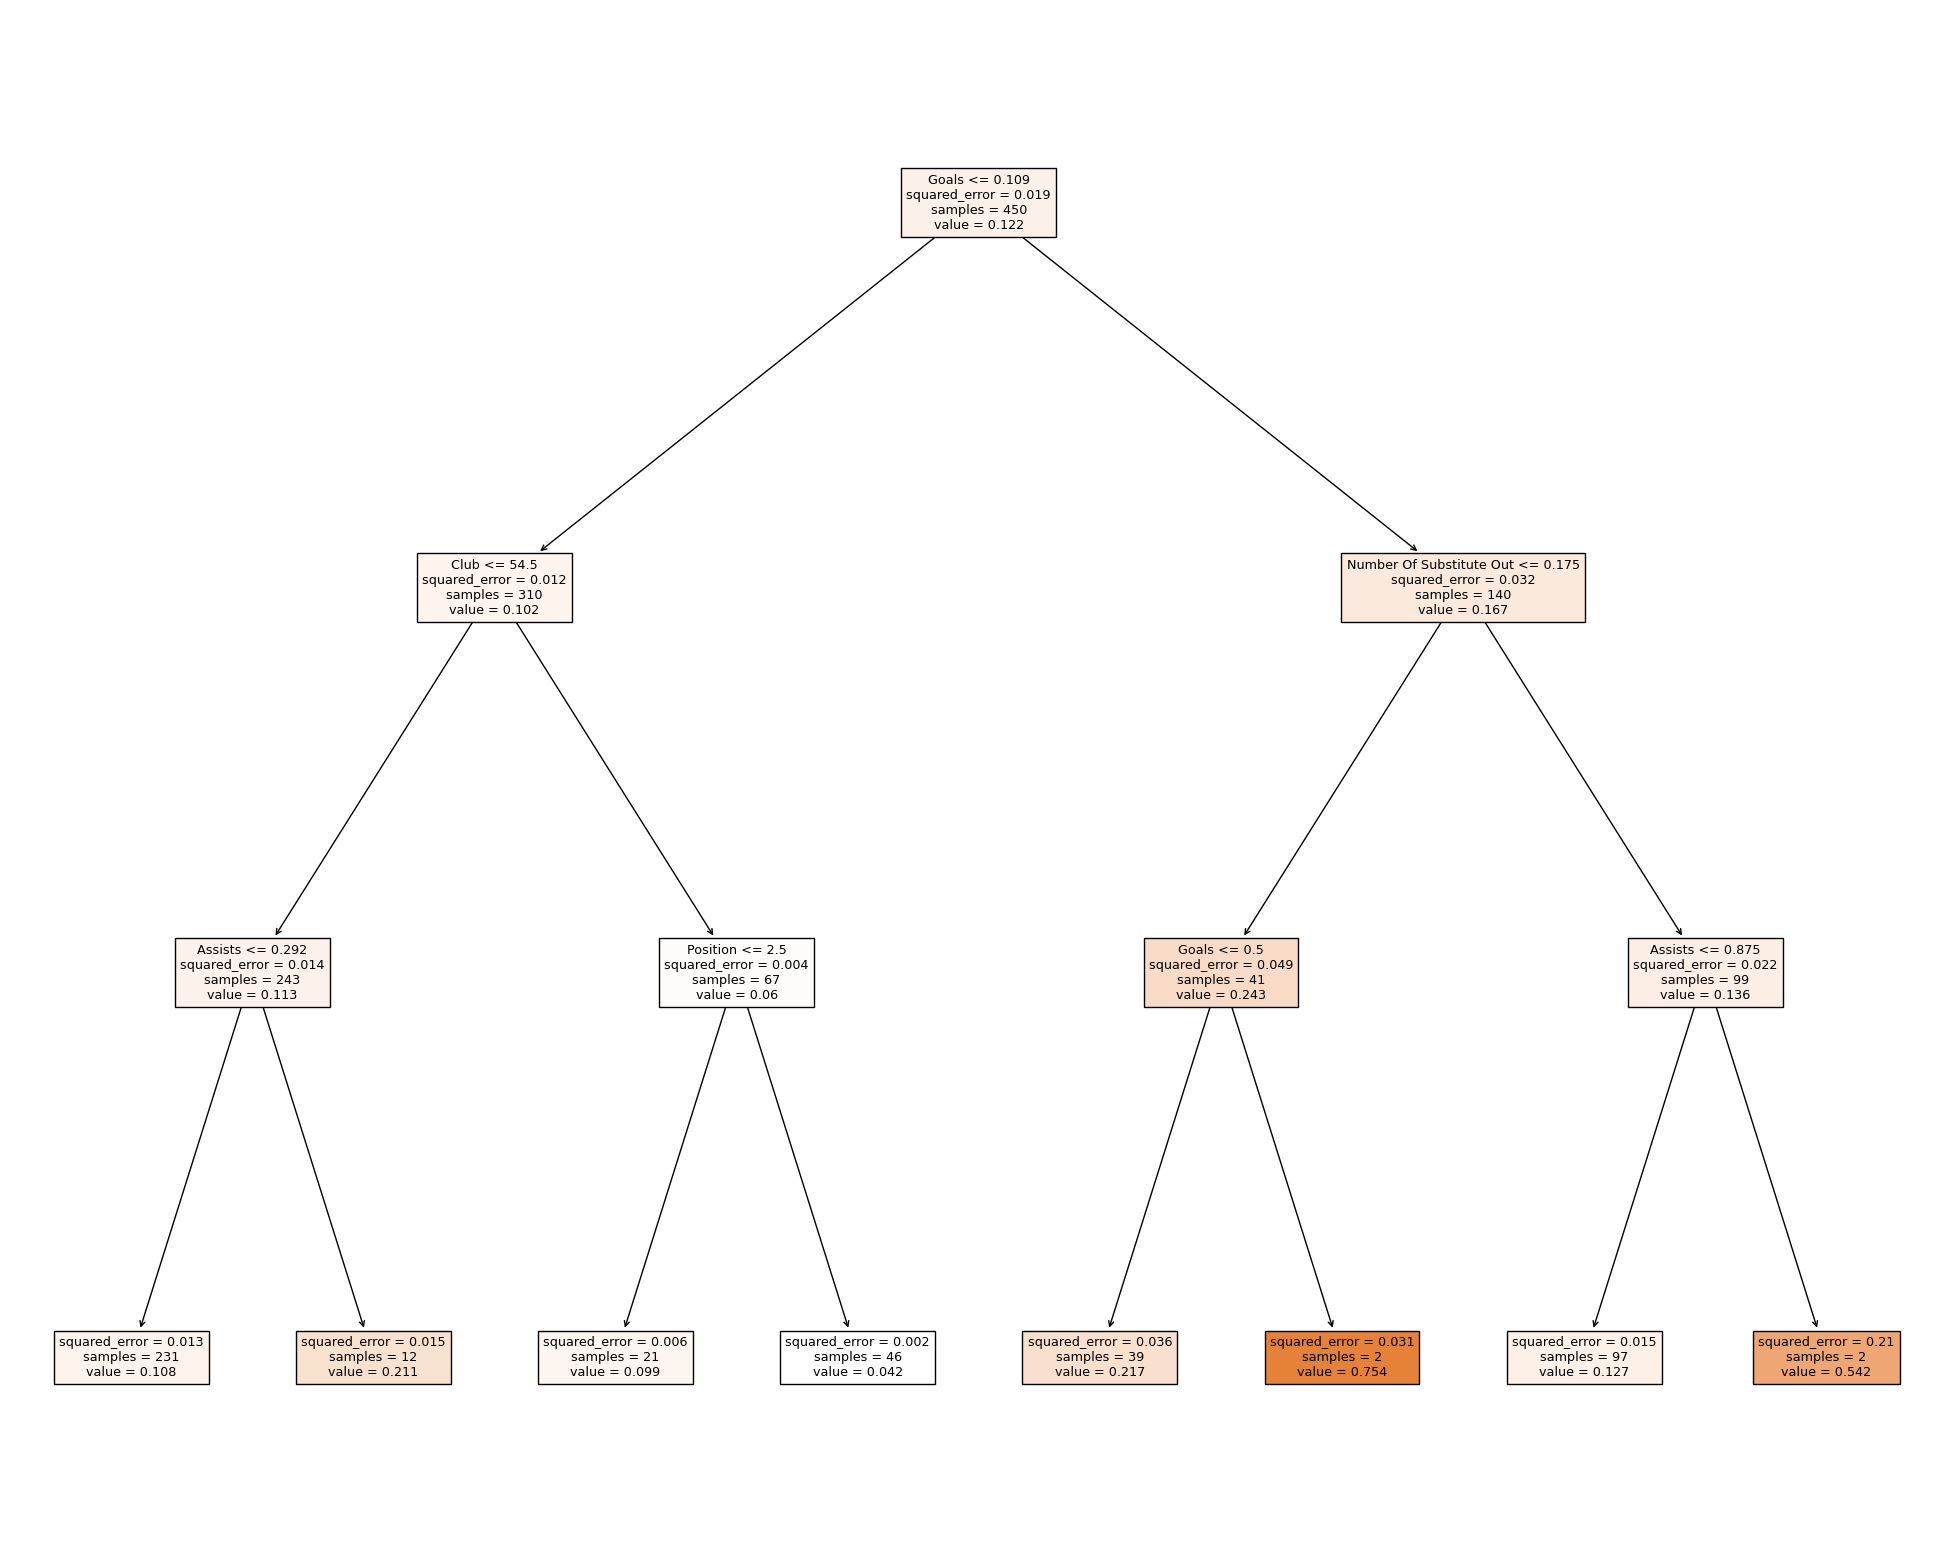

In [71]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
tree.plot_tree(DTree, feature_names= features.columns, filled=True)

This code is used to visualize a decision tree using the plot_tree function from the sklearn.tree module and matplotlib library. The DTree object is the trained decision tree model, and features is the DataFrame containing the features used for training the model.

###SVM Model

In [72]:
from sklearn.svm import SVR

In [73]:
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

SVR()

In [74]:
svm_pred = svm.predict(X_test)


In [75]:
#Checking accuracy of predictions

print('SVM Model - Test')
print('MAE: %f'% mean_absolute_error(y_test, svm_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, svm_pred)))   
print('R2 %f' % r2_score(y_test, svm_pred))

SVM Model - Test
MAE: 0.096508
RMSE: 0.123713
R2 0.007008


###AutoML

In [76]:
!pip install h2o


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694727 sha256=ed458256b569840e4ce5365ed91ee97b13c84f43e3dd1b72a7007c188bd7b60a
  Stored in directory: /root/.cache/pip/wheels/9a/54/b6/c9ab3e71309ef0000bbe39e715020dc151bbfc557784b7f4c9
Successfully built h2o


In [77]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.xgboost import H2OXGBoostEstimator
from h2o.grid.grid_search import H2OGridSearch
import psutil
import logging

In [78]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [79]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

5


In [80]:
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:17244..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpd_7csh1s
  JVM stdout: /tmp/tmpd_7csh1s/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpd_7csh1s/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:17244
Connecting to H2O server at http://127.0.0.1:17244 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_o2jvv6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [81]:
hf = h2o.H2OFrame(df)  # Converting Pandas dataframe in H2O dataframe


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [82]:
pct_rows = 0.10  # Setting up the data split between training and test dataset.
df_train, df_test = hf.split_frame([pct_rows])

In [83]:
# Setting up AutoML
def autoML(df_train, df_test):

    X = df_train.columns
    y = "Markey Value In Millions(£)"

    X.remove(y)  # Removing the result frm our predictors data

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return df_train, df_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m and "GBM" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model

In [84]:
autoML = autoML(df_train, df_test)  # Training AutoML

AutoML progress: |██
03:37:38.871: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 55.0.

█████████████████████████████████████████████████████████████| (done) 100%


In [85]:
autoML[2].leaderboard 

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_lr_annealing_selection_AutoML_1_20230410_33733_select_model,0.175438,0.0307784,0.12763,0.135672,0.0307784
GBM_grid_1_AutoML_1_20230410_33733_model_2,0.178491,0.0318591,0.123373,0.136861,0.0318591
GBM_grid_1_AutoML_1_20230410_33733_model_33,0.179587,0.0322517,0.129733,0.13893,0.0322517
GBM_grid_1_AutoML_1_20230410_33733_model_18,0.180046,0.0324165,0.130032,0.139202,0.0324165
GBM_grid_1_AutoML_1_20230410_33733_model_10,0.180745,0.0326688,0.130961,0.139624,0.0326688
GBM_grid_1_AutoML_1_20230410_33733_model_1,0.180928,0.0327351,0.126715,0.138146,0.0327351
GBM_grid_1_AutoML_1_20230410_33733_model_7,0.181201,0.0328336,0.131851,0.140495,0.0328336
StackedEnsemble_AllModels_5_AutoML_1_20230410_33733,0.181922,0.0330958,0.131438,0.139942,0.0330958
GBM_grid_1_AutoML_1_20230410_33733_model_23,0.181948,0.0331052,0.129679,0.139831,0.0331052
DRF_1_AutoML_1_20230410_33733,0.18328,0.0335916,0.137404,0.142778,0.0335916


In [86]:
autoML_model = getBestModel(autoML[2])  # Getting Best Model

9


In [87]:
autoML_best_predictions = autoML_model.predict(df_test).round()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [88]:
autoMLpredictions = h2o.as_list(autoML_best_predictions, use_pandas=False)
y_test_h2O = h2o.as_list(df_test["Markey Value In Millions(£)"], use_pandas=False)

In [89]:
def flatten(t):
    listt = [(item) for sublist in t for item in sublist][1:]
    listt = [float(x) for x in listt]
    x = pd.Series(listt)
    return x

In [90]:
autoMLpredictions = flatten(autoMLpredictions)
y_test_h2O = flatten(y_test_h2O)

####Hyperparameter Tuning of AutoML's Best Model


In [91]:
train, validate, test = np.split(
    df.sample(frac=1, random_state=42),
    [int(0.6 * len(df)), int(0.8 * len(df))],
)
train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

xgboost_hyper_params = {
    "ntrees": [50, 100, 150],
    "max_depth": [3, 5, 7],
    "learn_rate": [0.01, 0.05, 0.1],
    "sample_rate": [0.5, 0.8, 1.0],
    "col_sample_rate": [0.5, 0.8, 1.0]
}

search_criteria = {"strategy": "RandomDiscrete", "max_models": 100, "seed": 1}

gbm_grid5 = H2OGridSearch(
    model=H2OXGBoostEstimator,
    grid_id="gbm_grid5",
    hyper_params=xgboost_hyper_params,
    search_criteria=search_criteria,
)

gbm_grid5.train(
    x=list(X.columns),
    y="Markey Value In Millions(£)",
    training_frame=train,
    validation_frame=validate,
    seed=1,
)


def find_best_model_from_grid(h2o_grid, test_parameter):
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)
    max_index = model_list.index(max(model_list))
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " + best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " + str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " + str(best_model.auc()))
    return best_model


best_xgboost_model = find_best_model_from_grid(gbm_grid5, "r2")

Parse progress: |

"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost Grid Build progress: |███████████████████████████████████████████████████| (done) 100%
Model ID with best R2: gbm_grid5_model_66
Best R2: 0.9975089129200532


"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?


In [92]:
best_xgboost_model

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: gbm_grid5_model_66


Model Summary: 
    number_of_trees
--  -----------------
    150

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 4.914483631139057e-05
RMSE: 0.007010337817208994
MAE: 0.0041805449873209
RMSLE: 0.0058749769483167295
Mean Residual Deviance: 4.914483631139057e-05

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.01894265815927854
RMSE: 0.13763232962962788
MAE: 0.10685109330341219
RMSLE: 0.11629676322637855
Mean Residual Deviance: 0.01894265815927854

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse          training_mae          training_deviance       validation_rmse      validation_mae       validation_deviance
---  -------------------  ----------------  -----------------  ---------------------  --------------------  ----------------------  -------------------  -------------------  ---------------------
     2023-04-10 03:42:34  1 min 15.141 sec  0.0                0.4037406512124302     0.38551643200218677   0.1630065134414372      0.39773523251342     0.3779577470384538   0.1581933151825043
     2023-04-10 03:42:34  1 min 15.151 sec  1.0                0.3671694083999396     0.348931935702761     0.13481337446476166     0.36254344691379553  0.3423070484958589   0.1314377509001361
     2023-04-10 03:42:34  1 min 15.154 sec  2.0                0.3344871007106468     0.3164685680220524    0.11188162054181437     0.33026495072949713  0.3104026836715639   0.10907493768035717
     2023-04-10 03:42:34  1 min 15.157 sec  3.0                0.3053240918256983     0.28781689412891864   0.09322280104918745     0.3016546010611449   0.2816893500648439   0.09099549834135848
     2023-04-10 03:42:34  1 min 15.160 sec  4.0                0.2787680312212022     0.2614690665155649    0.07771161523094515     0.27669887766303514  0.25587677096948025  0.0765622688999833
     2023-04-10 03:42:34  1 min 15.163 sec  5.0                0.2553511719135535     0.2387974020590385    0.06520422099762514     0.25455719414843253  0.23410473769530654  0.06479936509272279
     2023-04-10 03:42:34  1 min 15.166 sec  6.0                0.23439016829896842    0.21866630839804807   0.054938750995218735    0.23473293740494972  0.2153324589692056   0.05509955190275605
     2023-04-10 03:42:34  1 min 15.169 sec  7.0                0.21544245853507957    0.20069893645743528   0.04641545293963947     0.21890248542578844  0.20092579996213317  0.04791829812558752
     2023-04-10 03:42:34  1 min 15.173 sec  8.0                0.19836737219567285    0.1843012556185325    0.0393496143518166      0.20566138335919837  0.18837270027026534  0.042296604605219154
     2023-04-10 03:42:35  1 min 15.294 sec  9.0                0.18313014962202961    0.16964019594093163   0.03353665170058696     0.1937714230778373   0.17728660410270095  0.03754736440161021
---  ---                  ---               ---                ---                    ---                   ---                     ---                  ---                  ---
     2023-04-10 03:42:36  1 min 16.728 sec  141.0              0.008192707665962133   0.004967826964954535  6.712045889991471e-05   0.1372493516854864   0.10649098111316561  0.018837384538086335
     2023-04-10 03:42:36  1 min 16.742 sec  142.0              0.008133108271514628   0.004911704125503699  6.614745015617968e-05   0.13728489348896858  0.10652187837287784  0.018847141980277444
     2023-04-10 03:42:36  1 min 16.757 sec  143.0              0.0077858558977135705  0.00471607534835736   6.061955205996119e-05   0.13744961076555973  0.10668331695720554  0.01889239549960387
     2023-04-10 03:42:36  1 min 16.773 sec  144.0              0.007481764621342968   0.00456018208215634   5.5976801849179287e-05  0.13762571014667518  0.10683596177026629  0.01894083609337665
     2023-04-10 03:42:36  1 min 16.790 sec  145.0              0.007367128317668153   0.004475474742551644  

In [93]:
# Evaluating the model on Test Data
autoML_best_predictions_2 = best_xgboost_model.predict(df_test).round()
autoMLpredictions_2 = h2o.as_list(autoML_best_predictions_2, use_pandas=False)
y_test_h2O_2 = h2o.as_list(df_test["Markey Value In Millions(£)"], use_pandas=False)
autoMLpredictions_2 = flatten(autoMLpredictions_2)
y_test_h2O_2 = flatten(y_test_h2O_2)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


####Evaluation Metrics Used

* Mean Absolute Error (MAE) represents the average magnitude of the errors in the predictions made by a model. It gives equal weightage to all the errors and is less sensitive to outliers. MAE is easier to understand as it represents the average absolute difference between the predicted values and the actual values.

* Root Mean Squared Error (RMSE) is the square root of the average of the squared differences between the predicted and actual values. RMSE gives more weightage to larger errors and is sensitive to outliers. It penalizes the model more heavily for making larger errors.

* R-squared (R2) is a statistical measure that represents the proportion of the variance in the dependent variable (y) that is explained by the independent variable(s) (x) in the model. R2 ranges from 0 to 1, with 1 indicating a perfect fit. R2 is a useful metric for comparing different models.

* R2 is useful for comparing different models and determining how well the model explains the variance in the data.


In [94]:
#Checking accuracy of predictions

print('Linear Model - Test')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))
print('--------------------------------------')
print('Decision tree')
print('MAE: %f'% mean_absolute_error(y_test, prediction_tree))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, prediction_tree)))   
print('R2 %f' % r2_score(y_test, prediction_tree))
print('--------------------------------------')


print('SVM Model - Test')
print('MAE: %f'% mean_absolute_error(y_test, svm_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, svm_pred)))   
print('R2 %f' % r2_score(y_test, svm_pred))
print('--------------------------------------')
train_metrics = autoML_model.model_performance(train=True)
print("Before HyperTune H20")
print("MAE: ", train_metrics.mae())
print("RMSE: ", train_metrics.rmse())
print("R2: ", train_metrics.r2())
print('--------------------------------------')

mae1 = best_xgboost_model.mae()
rmse1 = best_xgboost_model.rmse()
r21 = best_xgboost_model.r2(valid=True)
print("After HyperTune H20")
print(f"MAE: {mae1}")
print(f"RMSE: {rmse1}")
print("R2: {:.4f}".format(r21))


Linear Model - Test
MAE: 0.085034
RMSE: 0.119687
R2 0.070587
--------------------------------------
Decision tree
MAE: 0.112138
RMSE: 0.152297
R2 -0.504883
--------------------------------------
SVM Model - Test
MAE: 0.096508
RMSE: 0.123713
R2 0.007008
--------------------------------------
Before HyperTune H20
MAE:  0.1292701898224694
RMSE:  0.16387648280954104
R2:  0.24124279366200985
--------------------------------------
After HyperTune H20
MAE: 0.0041805449873209
RMSE: 0.007010337817208994
R2: -0.1328


###Model Selection

I trained multiple models for this purpose including the simplest Linear Regression to using AutoML to get the best model it could fit. The models I trained for this purpose were

* Linear Regressor
* Decision Tree
* Support Vector Machine(SVM) Regressor
* AutoML

* Linear Regressor is a simple linear model that assumes a linear relationship between the independent variables and the dependent variable. It tries to minimize the difference between the actual and predicted values of the dependent variable.

* Decision Tree is a tree-based model that partitions the data into smaller and smaller subsets based on the independent variables until a decision is made about the dependent variable. It is a non-parametric model that does not make any assumptions about the underlying distribution of the data.

* SVM Regressor is a kernel-based model that tries to find a hyperplane that best separates the data into two classes. In regression tasks, it tries to find a hyperplane that best fits the data. It can handle non-linear relationships between the independent and dependent variables using kernel functions.

* AutoML is an automated machine learning framework that automates the process of building and selecting the best machine learning model for a given task. It automates the process of hyperparameter tuning, model selection, and feature engineering, which are typically time-consuming and require expert knowledge.

* Based On R2 AutoMl fits best

###SHAP ANALYSIS

In [95]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
import shap

###SHAP Analysis of Linear Model

In [97]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


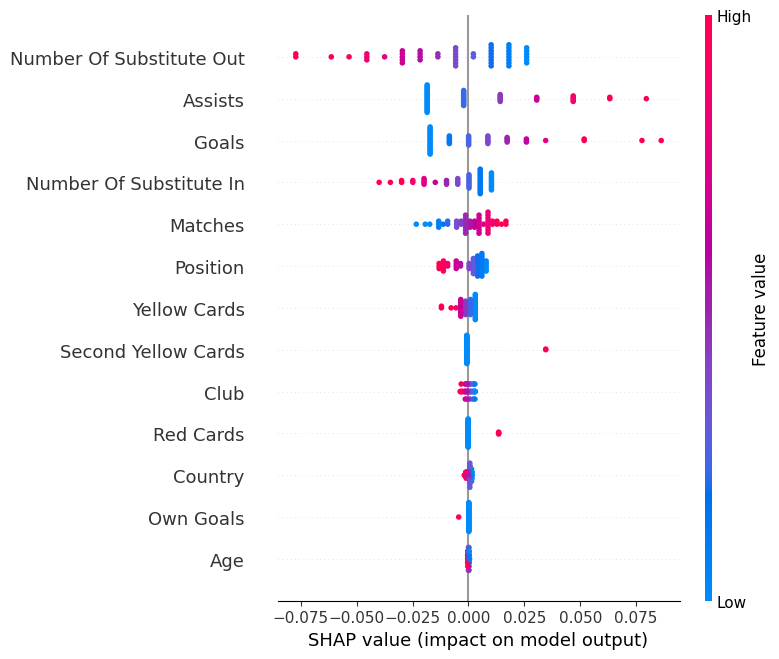

In [98]:
explainer_sh = shap.LinearExplainer(lin_reg, X_train, feature_dependence='independent')
shap_values_lg = explainer_sh.shap_values(X_test)
shap.summary_plot(shap_values_lg, X_test, feature_names=features.columns)

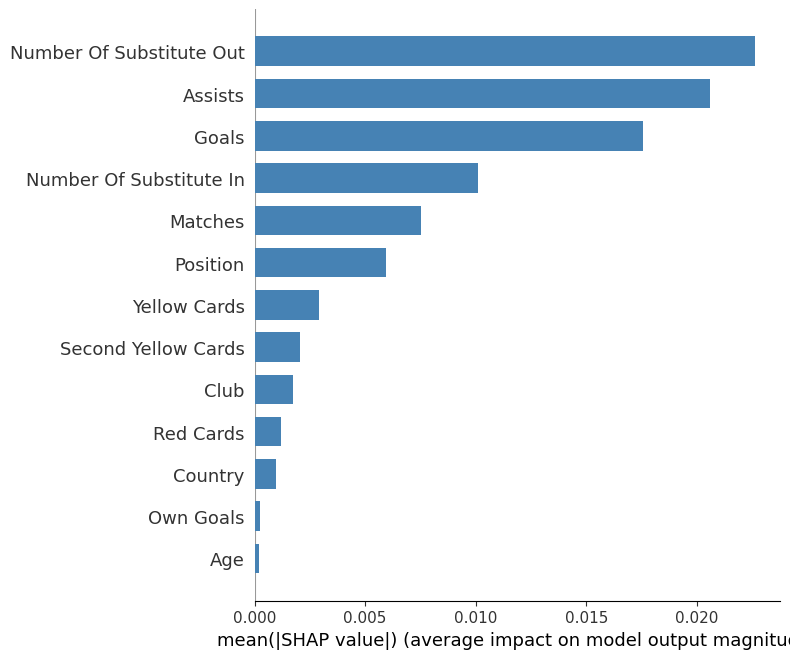

In [99]:
shap.summary_plot(shap_values_lg, X_train, plot_type="bar", color='steelblue')

###SHAP Analysis of Tree Model

In [101]:
explainer_tree = shap.Explainer(DTree)
shap_values_tree = explainer_tree(X_test)

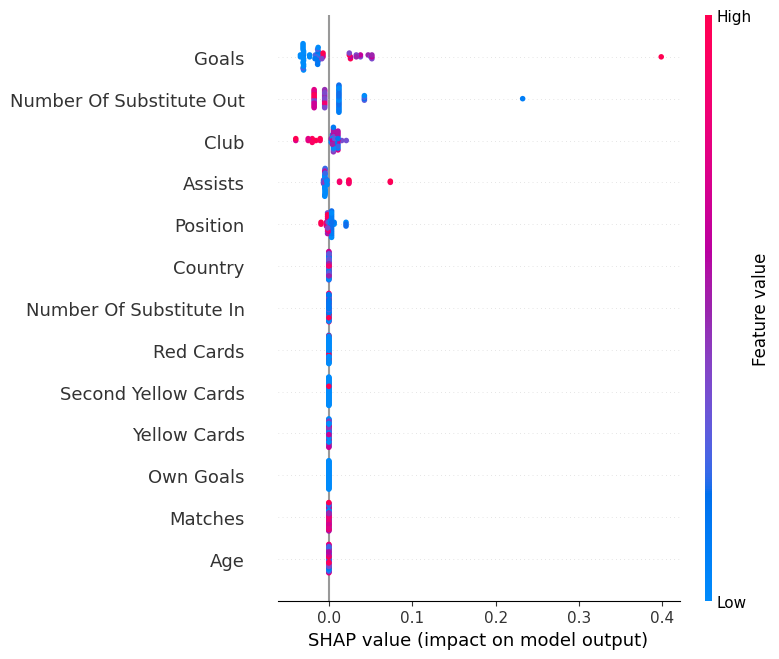

In [102]:
shap.summary_plot(shap_values_tree, X_test, feature_names=features.columns)

###Shap ANalysis of SVM

In [107]:
svm_explainer = shap.Explainer(svm.predict, X_train_100)
svm_shap_values = svm_explainer(X_train_100)


Permutation explainer: 101it [01:19,  1.21it/s]


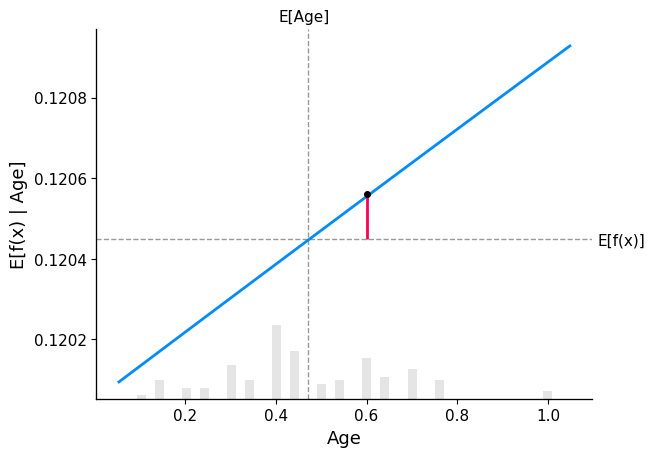

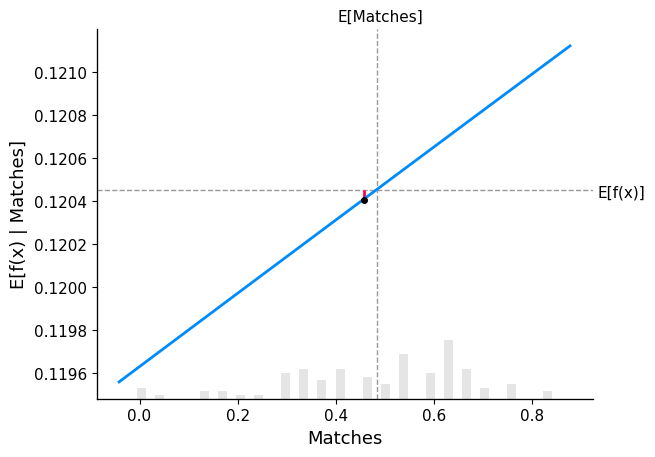

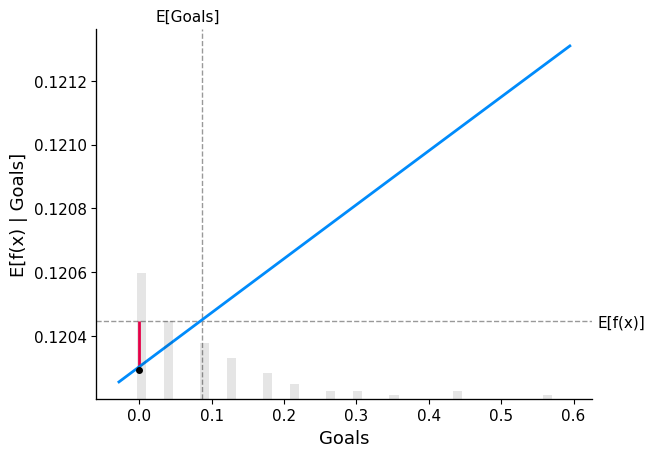

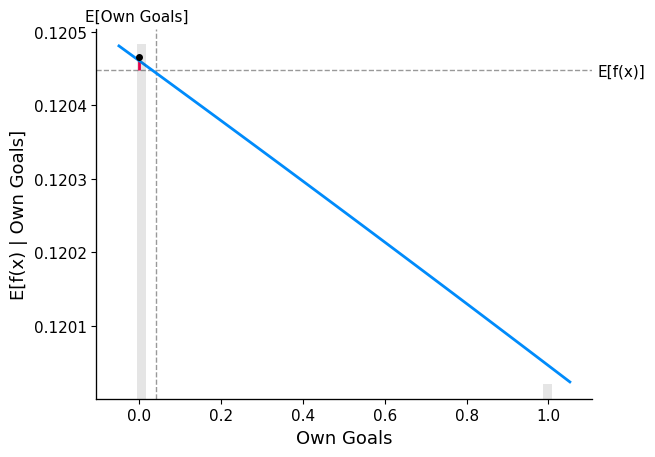

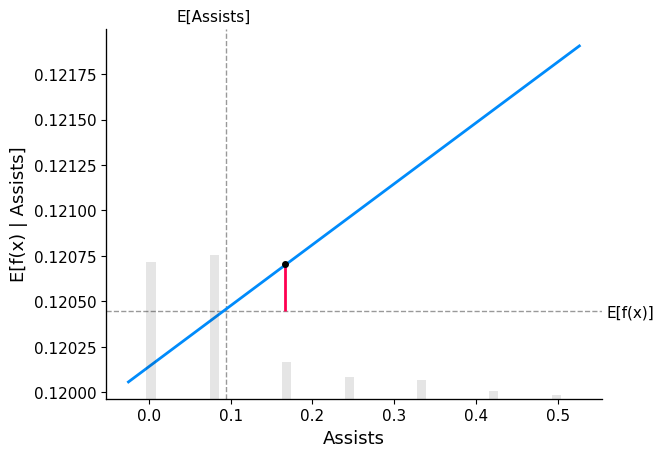

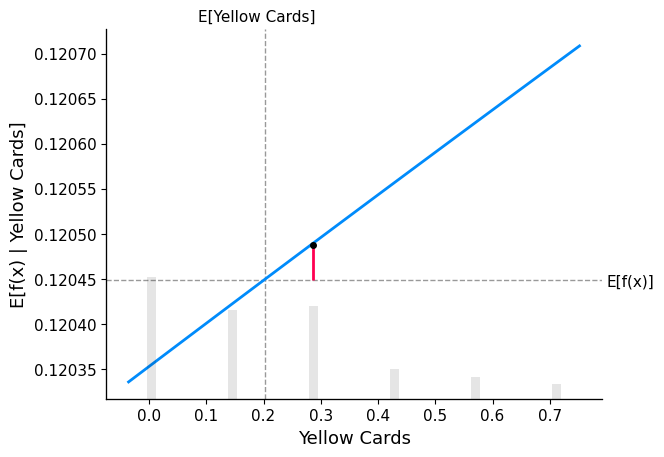

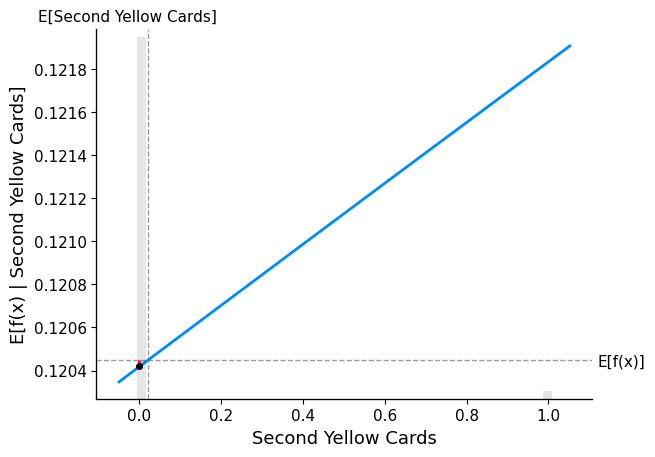

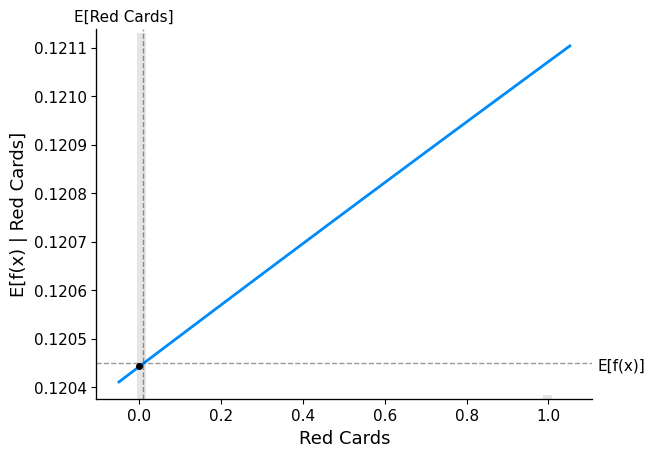

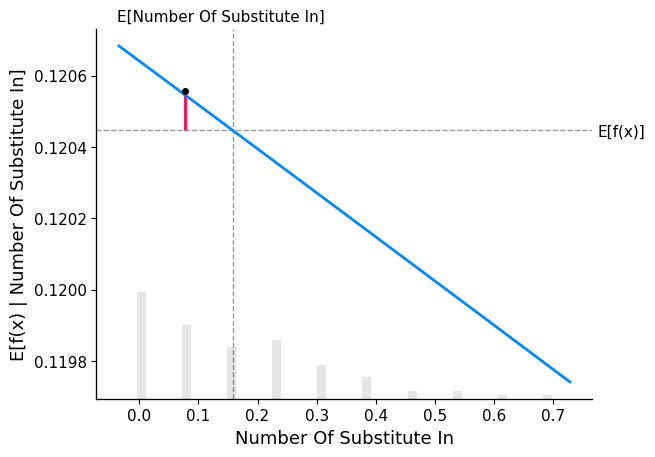

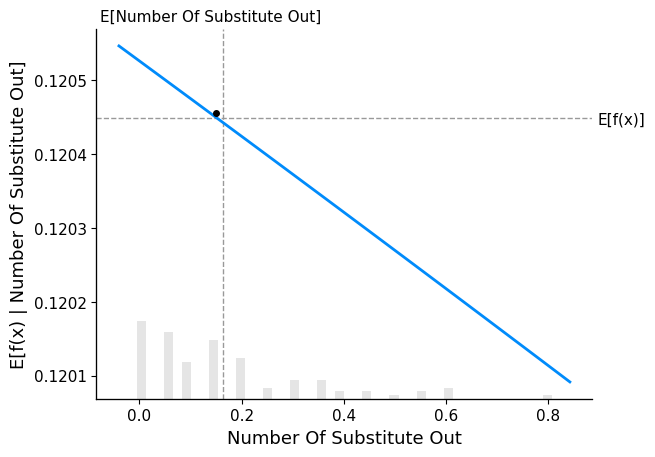

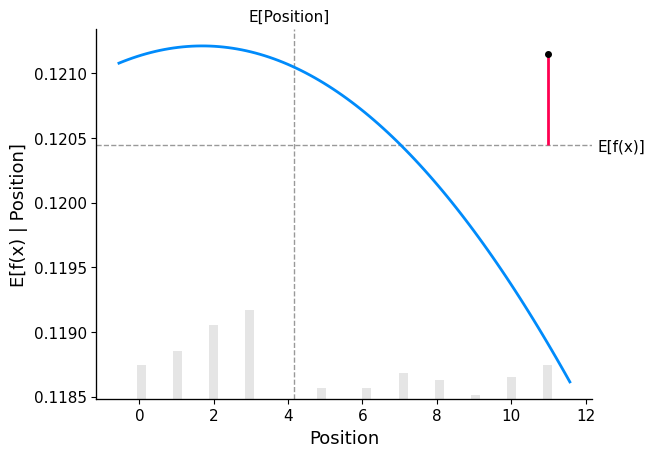

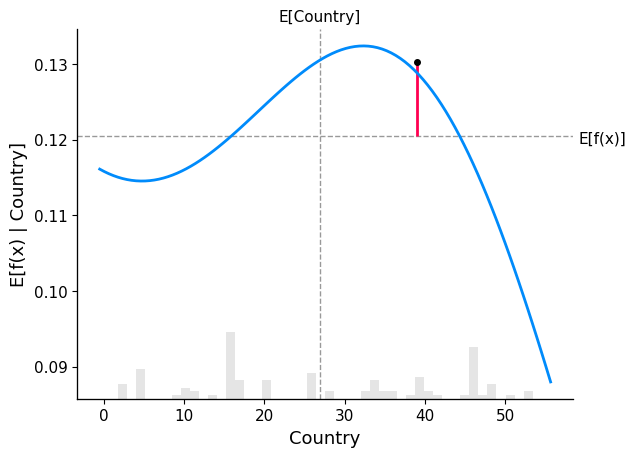

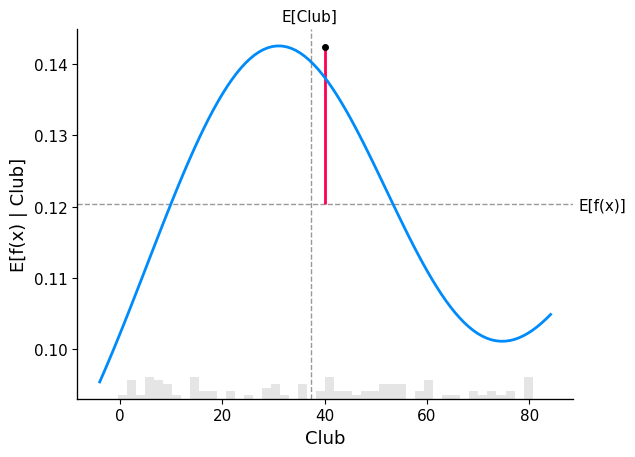

In [108]:
for i in X_train_100.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        svm.predict,
        X_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=svm_shap_values[sample_ind : sample_ind + 1, :],
    )

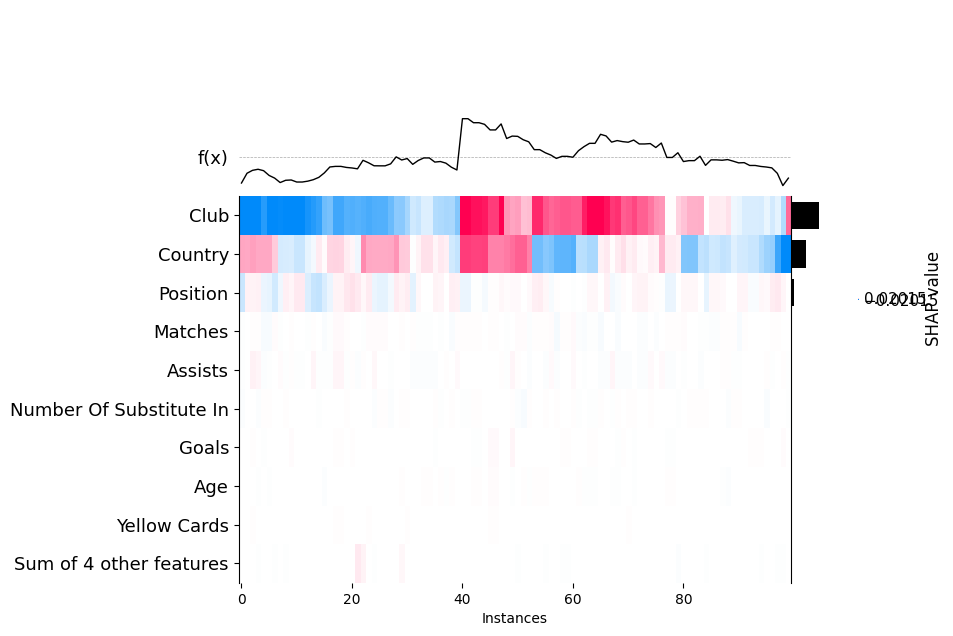

In [109]:
shap.plots.heatmap(svm_shap_values)  # SHAP HeatMap of a Tree Based Model


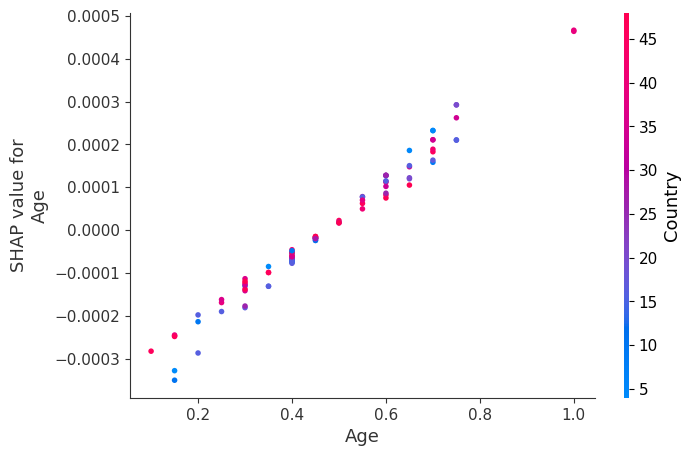

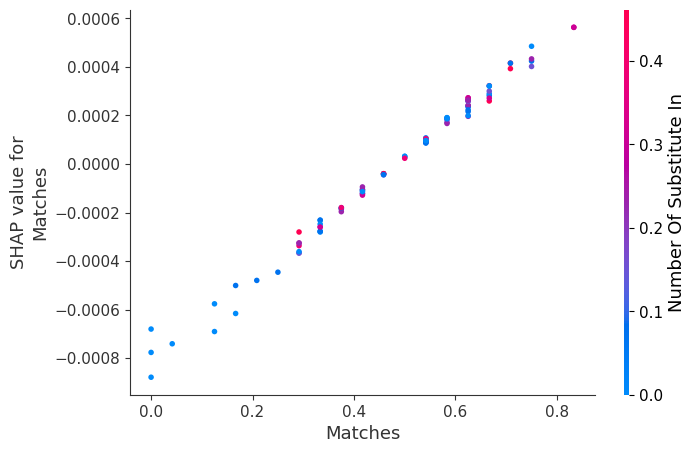

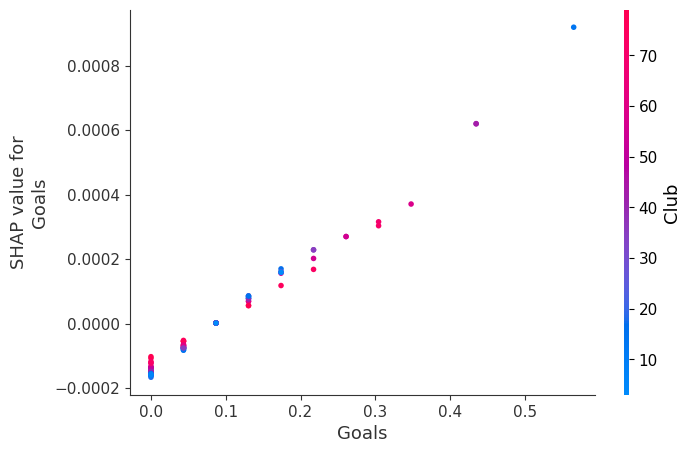

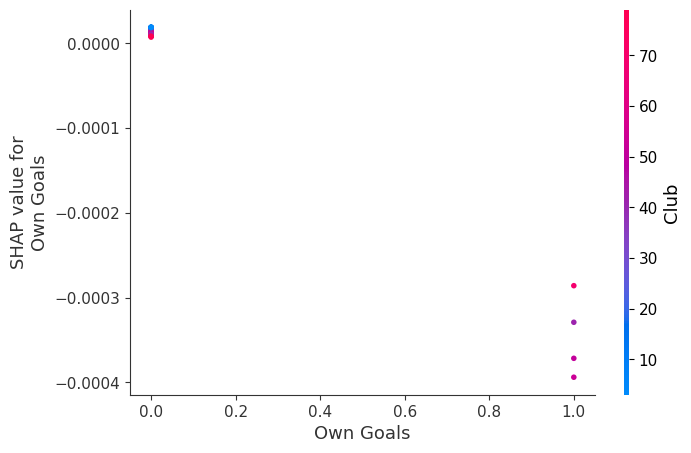

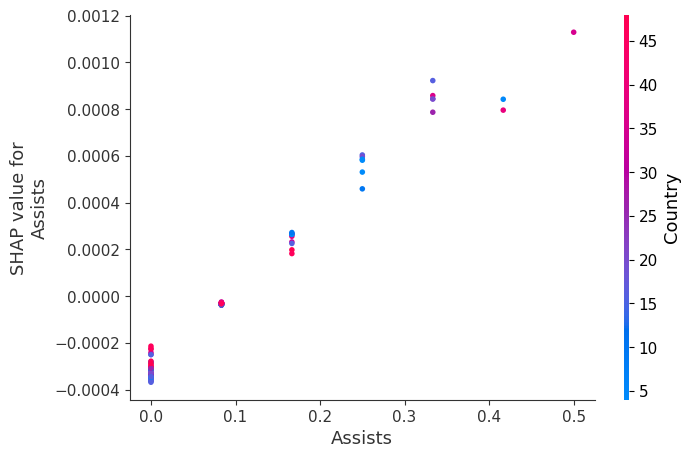

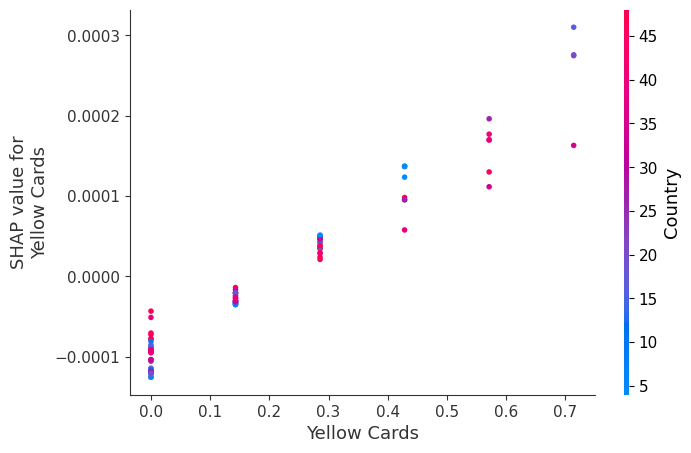

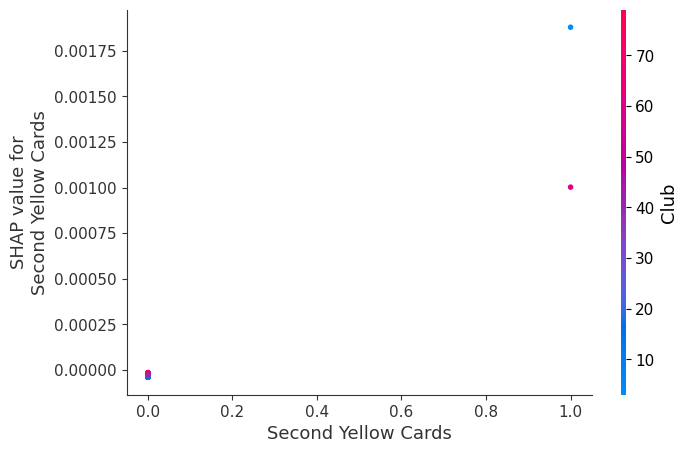

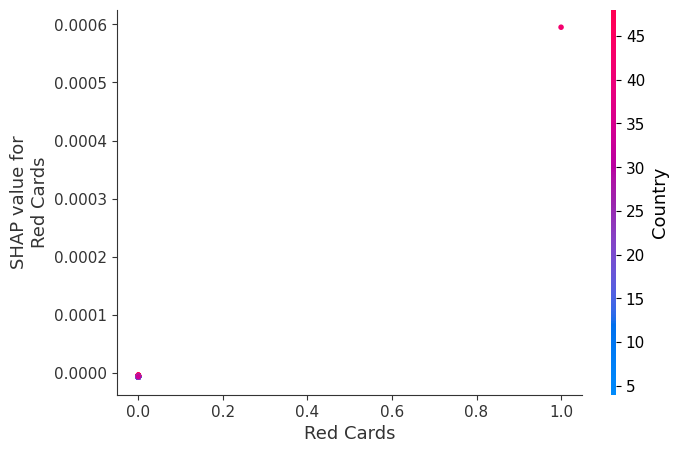

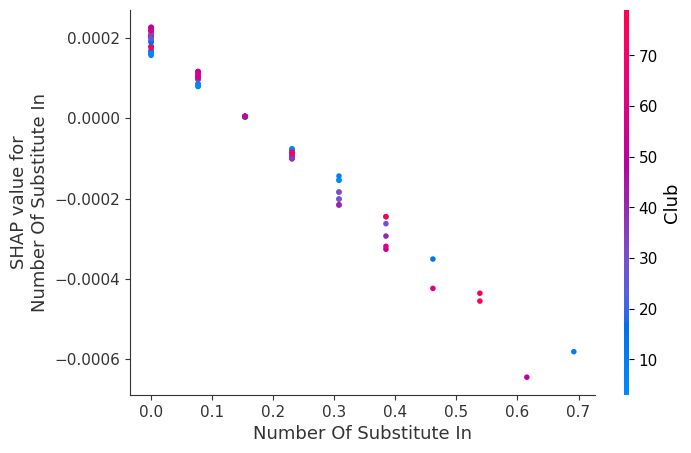

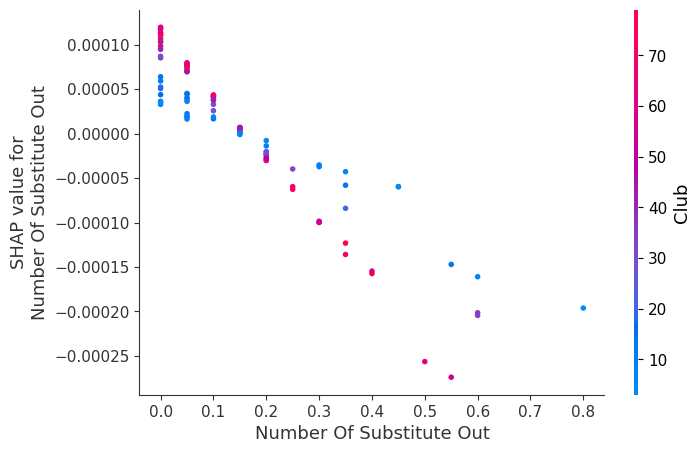

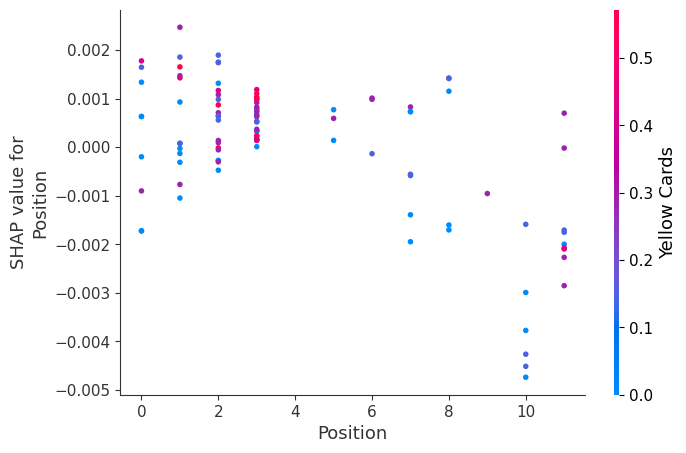

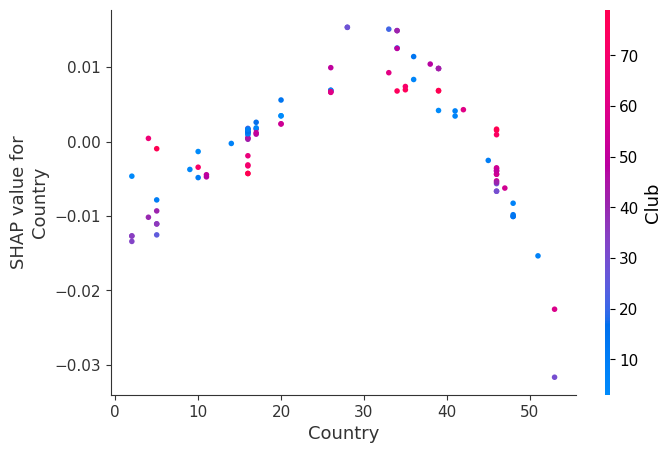

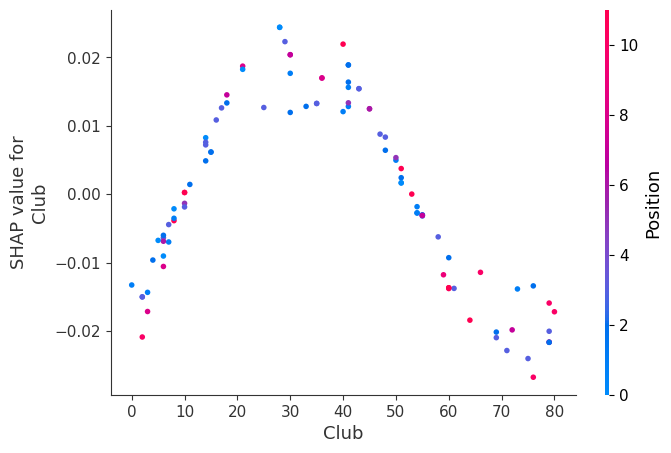

In [113]:
# SHAP partial dependence plot for a tree based model
for i in X_train.columns:
    shap.dependence_plot(i, svm_shap_values.values, X_train_100)


###SHAP

SHAP analysis is particularly useful in understanding the importance of features for complex models like tree-based models or neural networks, where it is difficult to interpret feature importance. It can help identify features that are most important for a model's predictions and help identify potential biases or areas for model improvement.

SHAP values can be computed for any model that has a well-defined mapping from features to predictions. SHAP values are based on the Shapley value from game theory, which is a way to fairly distribute payouts from a cooperative game among players. In the case of machine learning, the "game" is predicting the target variable, and the "players" are the features used to make the prediction.

There are various Python libraries that can be used to compute SHAP values, such as SHAP (developed by the same authors who introduced SHAP), ELI5, and Treeinterpreter. These libraries can be used with various machine learning models, such as XGBoost, Random Forests, and Neural Networks.

#Learning Outcome

* I learned the complete lifecycle of a Data Science project right from data prepartion to hyperparameter tuning
* Majority of the time should be invested in data preparation i.e. cleaning the data, normalizing, feature selection, imputation etc
* Hyperparameter tuning is the second most important thing after data preparation, which most of the practioner's ignore. But the results are worth the time invested
* Multiple models must be trained and the best models should be selected to be deployed, as some algorithms perform much better than the other's on specific tasks
* Model Interpretation(Unboxing the Black Blox) is the best takeaway from the series of this assignments. SHAP, LIME and PDP have made it easier to understand what made a model to predict a outcome.

#References

* https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
* https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d